In [1]:
# Loading required libraries
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import k_means
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Reading Dataset

In [2]:

world= pd.read_excel(r"C:\Users\Hp\Desktop\World_development_mesurement.xlsx")
world

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,NaN,NaN,NaN,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,32427,0.911,NaN,NaN
2700,0.013,46.4%,NaN,United States,5.0,4.0,2132446.0,"$16,244,600,000,000",0.179,"$8,895",...,76.0,1.0,1,0.196,0.667,0.136,313873685,0.811,"$200,092,000,000","$126,573,000,000"
2701,0.015,41.9%,NaN,Uruguay,7.0,85.0,NaN,"$50,004,354,667",0.089,"$1,308",...,74.0,1.5,1,0.220,0.639,0.140,3395253,0.948,"$2,222,000,000","$1,028,000,000"
2702,0.020,61.9%,NaN,"Venezuela, RB",144.0,180.0,NaN,"$381,286,223,859",0.046,$593,...,72.0,1.0,1,0.288,0.652,0.060,29954782,0.889,"$904,000,000","$3,202,000,000"


# Purpose
1. Analyzing the impact of economic indicators on a country's development status.
2.Analyzing renewable energy adoption and its influence on carbon emissions.
3. Predecting GDP grwoth rate based on various economic indicators.
4.Predicting poverty levels using demographic and economic variables.

# Limitation 
1.The dataset may contain missing or incomplete data for certain countries or indicators. Inaccuracies or errors in data collection, reporting, or entry could also be present, affecting the overall quality of the analysis

2.The dataset may not cover all countries or regions worldwide, which could lead to biases or limited generalizability of the findings, particularly for smaller or less well-known countries.


4.World development is an ongoing process with factors continuously changing over time. The dataset might not capture the dynamism and evolution of various development indicators adequately.

5.Countries have diverse characteristics and challenges. Treating all countries as a homogeneous group could overlook specific challenges faced by individual nations.



# Exploratory Data Analysis

In [3]:
# information about dataset
info = pd.DataFrame(world.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [4]:
# Renaming columns
world.rename(columns={'Birth Rate':'birth_rate', 'Business Tax Rate':'business_tax_rate','CO2 Emissions':'co2_emission','Country':'country',
                      'Days to Start Business':'days_to_start_business','Ease of Business':'ease_of_business','Energy Usage':'energy_usage',
                      'Gdp':'gdp','Health Exp % GDP':'health_exp_percent_GDP','Health Exp/Capita' :'health_exp_percapita',
                      'Hours to do Tax':'hours_to_do_tax','Infant Mortality Rate':'infant_mortality_rate','Internet Usage':'internet_usage',
                      'Lending Interest':'lending_interest','Life Expectancy Female':'life_expectancy_female','Life Expectancy Male':'life_expectancy_male',
                      'Mobile Phone Usage':'mobile_phone_usage','Number of Records':'no_of_records','Population 0-14':'population_0_14',
                      'Population 15-64':'population_15_64', 'Population 65+':'population_65_plus','Population Total':'population_total','Population Urban':'population_urban',
                      'Tourism Inbound':'tourism_inbound','Tourism Outbound':'tourism_outbound'}, inplace=True)

In [5]:
world.head()

,birth_rate,business_tax_rate,co2_emission,country,days_to_start_business,ease_of_business,energy_usage,GDP,health_exp_percent_GDP,health_exp_percapita,...,life_expectancy_male,mobile_phone_usage,no_of_records,population_0_14,population_15_64,population_65_plus,population_total,population_urban,tourism_inbound,tourism_outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"


In [6]:
world.isnull().sum()

birth_rate                 119
business_tax_rate         1281
co2_emission               579
country                      0
days_to_start_business     986
ease_of_business          2519
energy_usage               919
GDP                        210
health_exp_percent_GDP     309
health_exp_percapita       309
hours_to_do_tax           1288
infant_mortality_rate      260
internet_usage             173
lending_interest           824
life_expectancy_female     136
life_expectancy_male       136
mobile_phone_usage         167
no_of_records                0
population_0_14            220
population_15_64           220
population_65_plus         220
population_total             0
population_urban            26
tourism_inbound            368
tourism_outbound           471
dtype: int64

In [7]:
# Dropping columns "Ease of Business & No. of Records"
'''here we are deleting Ease of business because there are 2519 null values out of 2704 rows ,
 and we also delete  Number of Records having only 1 as a value '''

world_2 = world.drop(columns=['ease_of_business','no_of_records'] , axis=1)

In [8]:
# Removing Special Characters ($, %)
''' Here we are replacing  "$", "%" and "," symbol with space'''

colstocheck = world_2.columns
world_2[colstocheck] = world_2[colstocheck].replace({'\$|\%|\,':""}, regex = True)

world_2.head()

,birth_rate,business_tax_rate,co2_emission,country,days_to_start_business,energy_usage,GDP,health_exp_percent_GDP,health_exp_percapita,hours_to_do_tax,...,life_expectancy_female,life_expectancy_male,mobile_phone_usage,population_0_14,population_15_64,population_65_plus,population_total,population_urban,tourism_inbound,tourism_outbound
0,0.020,NaN,87931.0,Algeria,NaN,26998.0,54790058957,0.035,60,NaN,...,71.0,67.0,0.0,0.342,0.619,0.039,31719449,0.599,102000000,193000000
1,0.050,NaN,9542.0,Angola,NaN,7499.0,9129594819,0.034,22,NaN,...,47.0,44.0,0.0,0.476,0.499,0.025,13924930,0.324,34000000,146000000
2,0.043,NaN,1617.0,Benin,NaN,1983.0,2359122303,0.043,15,NaN,...,57.0,53.0,0.0,0.454,0.517,0.029,6949366,0.383,77000000,50000000
3,0.027,NaN,4276.0,Botswana,NaN,1836.0,5788311645,0.047,152,NaN,...,52.0,49.0,0.1,0.383,0.587,0.029,1755375,0.532,227000000,209000000
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,2610959139,0.051,12,NaN,...,52.0,49.0,0.0,0.468,0.505,0.028,11607944,0.178,23000000,30000000


In [9]:
# Calculating percentage of missing/null values
percent_missing = round(world_2.isnull().sum() * 100 / len(world_2),3)
percent_missing.sort_values(ascending=False)

hours_to_do_tax           47.633
business_tax_rate         47.374
days_to_start_business    36.464
energy_usage              33.987
lending_interest          30.473
co2_emission              21.413
tourism_outbound          17.419
tourism_inbound           13.609
health_exp_percent_GDP    11.428
health_exp_percapita      11.428
infant_mortality_rate      9.615
population_0_14            8.136
population_65_plus         8.136
population_15_64           8.136
GDP                        7.766
internet_usage             6.398
mobile_phone_usage         6.176
life_expectancy_male       5.030
life_expectancy_female     5.030
birth_rate                 4.401
population_urban           0.962
population_total           0.000
country                    0.000
dtype: float64

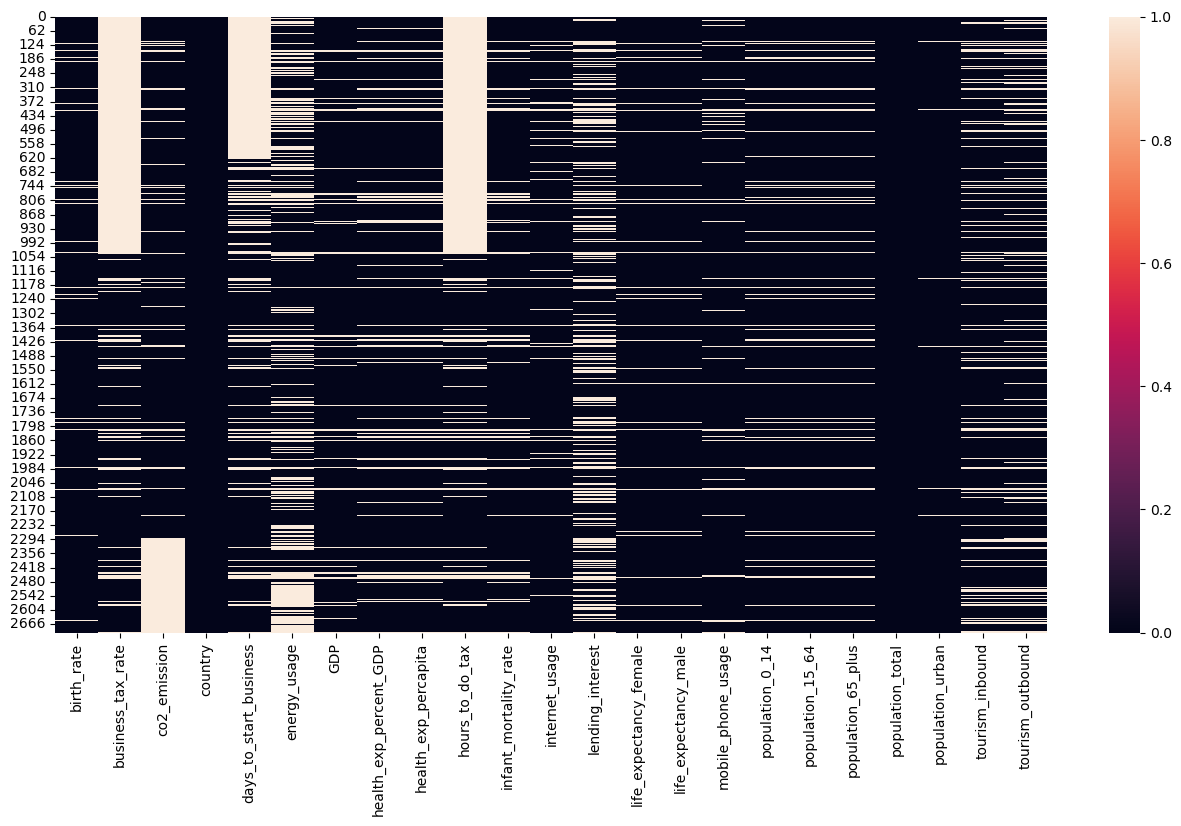

In [10]:
# Heatmap for null values
plt.figure(figsize=(16,8))
sns.heatmap(world_2.isnull())
plt.show()

In [11]:
# Converting Object datatypes to Numeric Datatypes
world_2["GDP"] = pd.to_numeric(world_2["GDP"], errors='coerce')
world_2["tourism_inbound"] = pd.to_numeric(world_2["tourism_inbound"], errors='coerce')
world_2["tourism_outbound"] = pd.to_numeric(world_2["tourism_outbound"], errors='coerce')
world_2['business_tax_rate'] = pd.to_numeric(world_2['business_tax_rate'], errors='coerce')
world_2['health_exp_percapita'] = pd.to_numeric(world_2['health_exp_percapita'], errors='coerce')

In [12]:
# Checking dataset info after converting the datatypes
world_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   birth_rate              2585 non-null   float64
 1   business_tax_rate       1423 non-null   float64
 2   co2_emission            2125 non-null   float64
 3   country                 2704 non-null   object 
 4   days_to_start_business  1718 non-null   float64
 5   energy_usage            1785 non-null   float64
 6   GDP                     2494 non-null   float64
 7   health_exp_percent_GDP  2395 non-null   float64
 8   health_exp_percapita    2395 non-null   float64
 9   hours_to_do_tax         1416 non-null   float64
 10  infant_mortality_rate   2444 non-null   float64
 11  internet_usage          2531 non-null   float64
 12  lending_interest        1880 non-null   float64
 13  life_expectancy_female  2568 non-null   float64
 14  life_expectancy_male    2568 non-null   

In [13]:
# Describing the data
world_2.describe().T

,count,mean,std,min,25%,50%,75%,max
birth_rate,2585.0,2.271489e-02,1.133843e-02,7.000000e-03,1.300000e-02,2.000000e-02,3.100000e-02,5.300000e-02
business_tax_rate,1423.0,4.896690e+01,4.095412e+01,8.200000e+00,3.240000e+01,4.100000e+01,5.155000e+01,3.391000e+02
co2_emission,2125.0,1.423071e+05,6.159288e+05,7.000000e+00,1.360000e+03,8.529000e+03,5.910800e+04,8.286892e+06
days_to_start_business,1718.0,3.999942e+01,5.731859e+01,1.000000e+00,1.300000e+01,2.600000e+01,4.500000e+01,6.940000e+02
energy_usage,1785.0,7.723684e+04,2.599239e+05,8.000000e+00,3.737000e+03,1.433800e+04,4.185200e+04,2.727728e+06
GDP,2494.0,2.638540e+11,1.129910e+12,6.310127e+07,3.539042e+09,1.507975e+10,1.102047e+11,1.624460e+13
health_exp_percent_GDP,2395.0,6.416952e-02,2.632460e-02,8.000000e-03,4.600000e-02,6.100000e-02,7.900000e-02,2.250000e-01
health_exp_percapita,2395.0,8.013971e+02,1.473448e+03,2.000000e+00,5.000000e+01,1.930000e+02,6.650000e+02,9.908000e+03
hours_to_do_tax,1416.0,3.020685e+02,2.732997e+02,1.200000e+01,1.560000e+02,2.390000e+02,3.447500e+02,2.600000e+03
infant_mortality_rate,2444.0,3.281301e-02,2.996760e-02,2.000000e-03,9.000000e-03,2.000000e-02,5.300000e-02,1.410000e-01


## Interpretations on Data Description

* co2_emission, energy_usage, GDP, health_exp_percapita, population_total, tourism_inbound, tourism_outbound mean values are far away from the 50% of the data.

* Remaining features are somewhat nearby the 50% of data.

In [14]:
features = world_2.drop(columns='country',axis = 1)

In [15]:
features.skew().sort_values(ascending=False)

lending_interest          15.536119
GDP                        9.424247
population_total           8.788164
co2_emission               8.654039
days_to_start_business     7.437592
tourism_inbound            7.114871
energy_usage               7.062230
tourism_outbound           5.210304
hours_to_do_tax            4.491308
business_tax_rate          4.342568
health_exp_percapita       2.817482
health_exp_percent_GDP     1.179757
infant_mortality_rate      1.049118
internet_usage             0.940966
population_65_plus         0.919841
birth_rate                 0.662151
mobile_phone_usage         0.569605
population_0_14            0.059660
population_urban           0.012519
population_15_64          -0.186881
life_expectancy_male      -0.705485
life_expectancy_female    -0.891556
dtype: float64

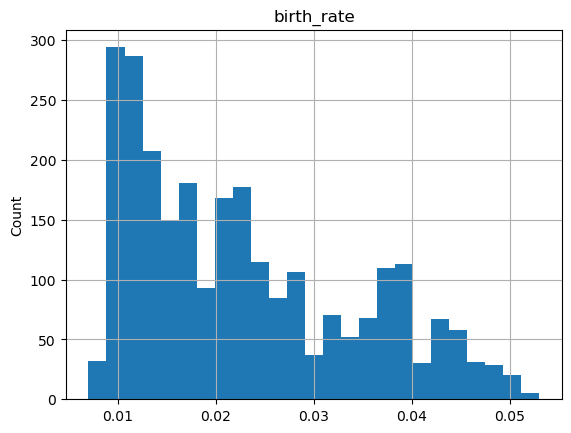

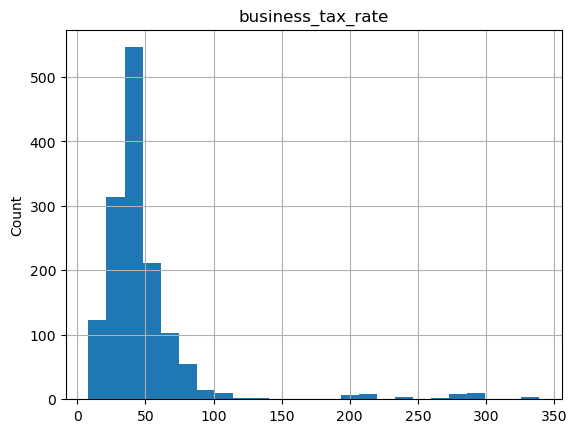

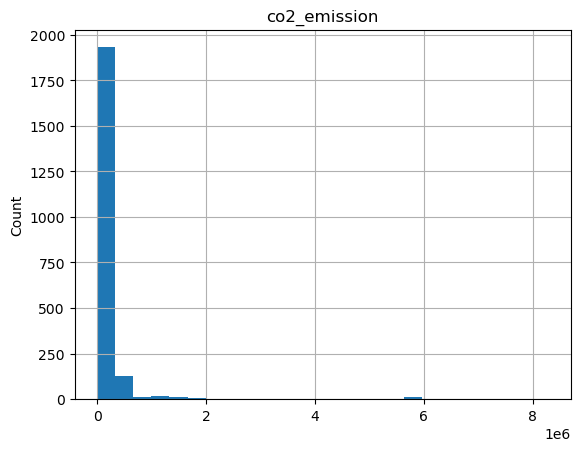

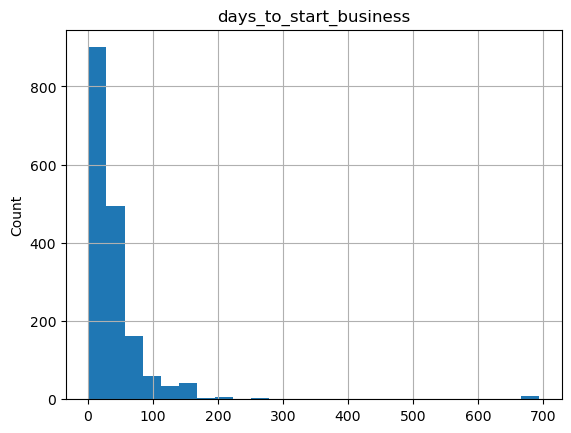

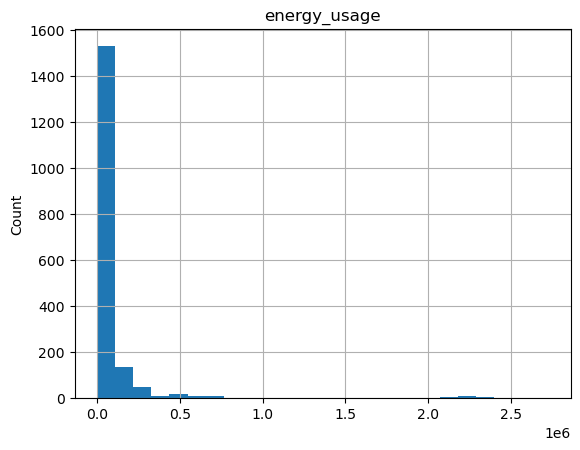

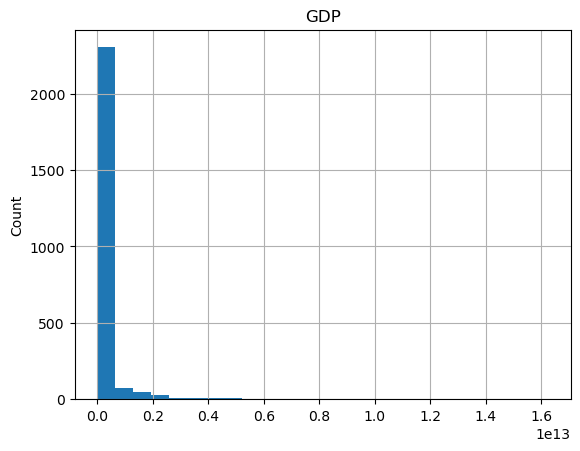

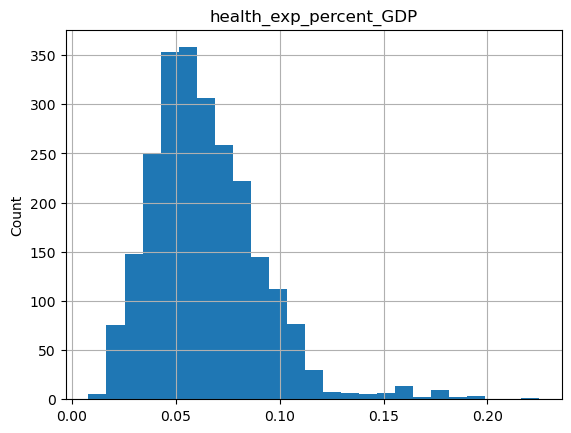

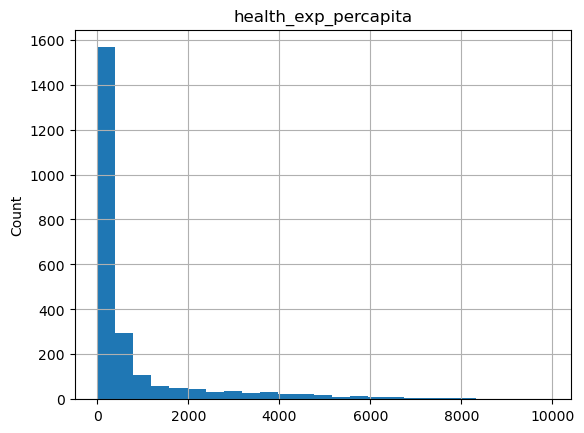

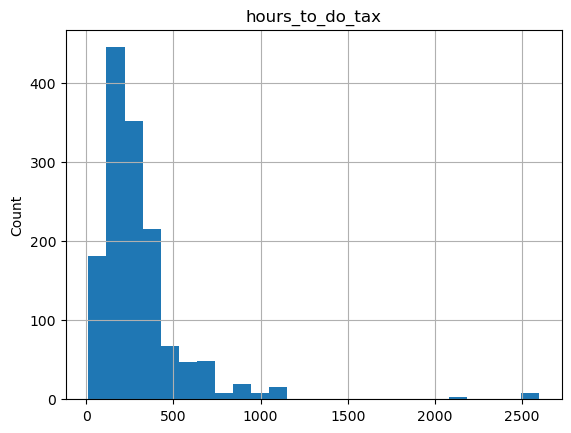

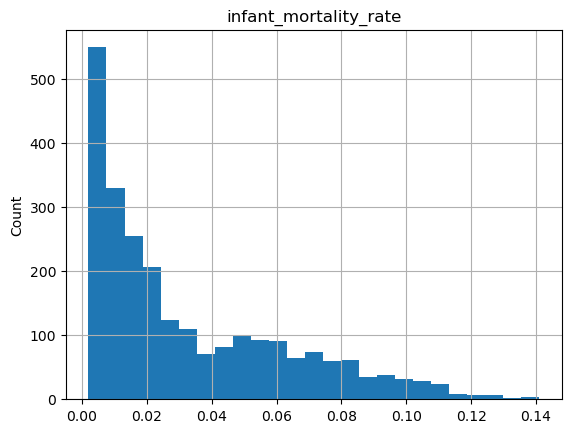

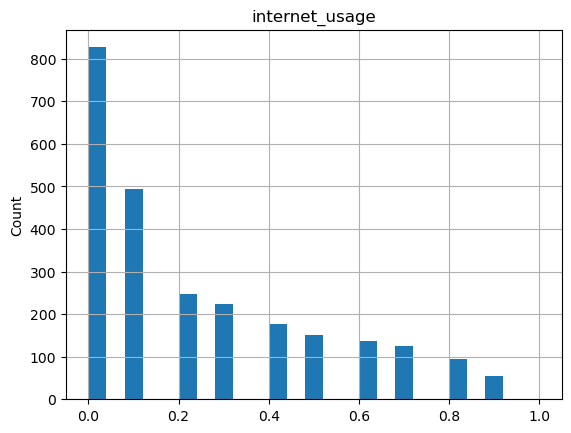

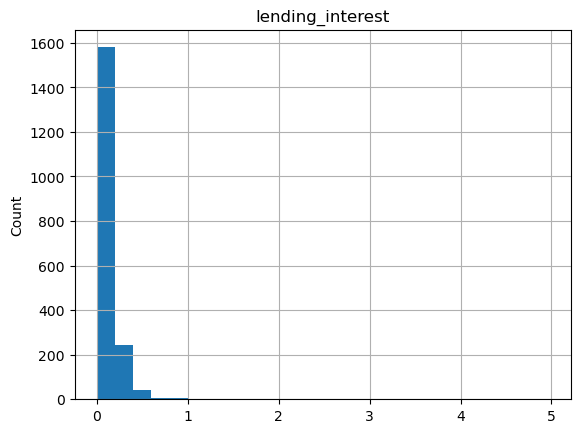

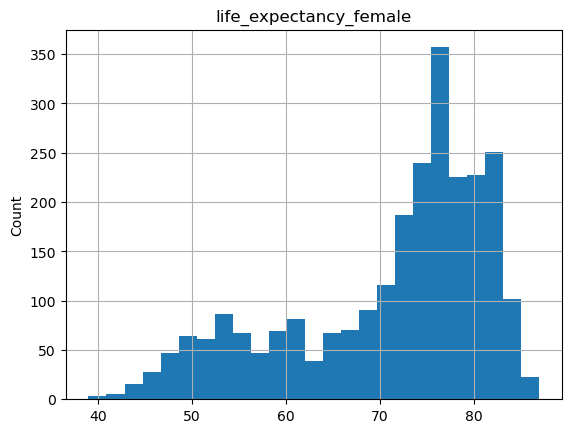

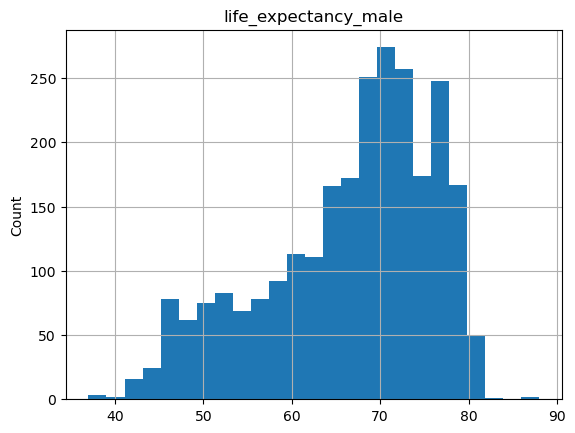

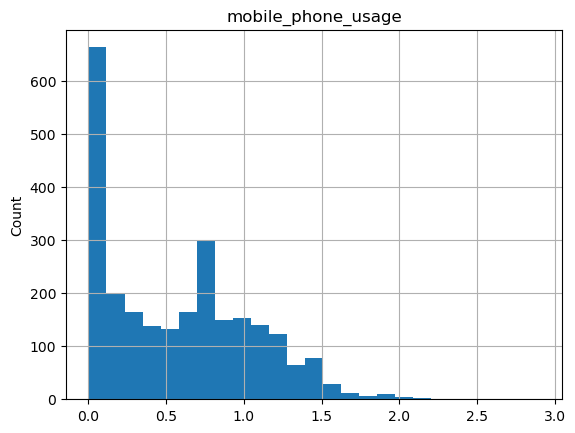

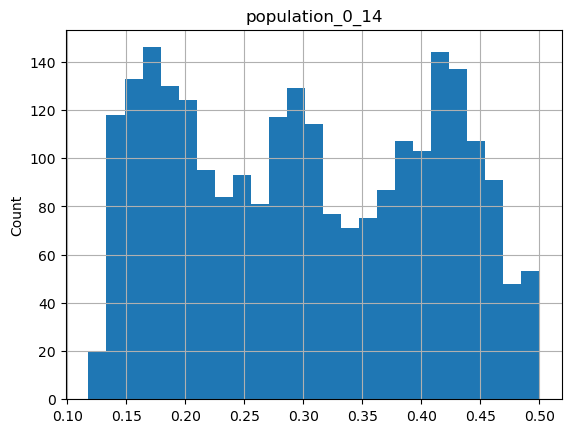

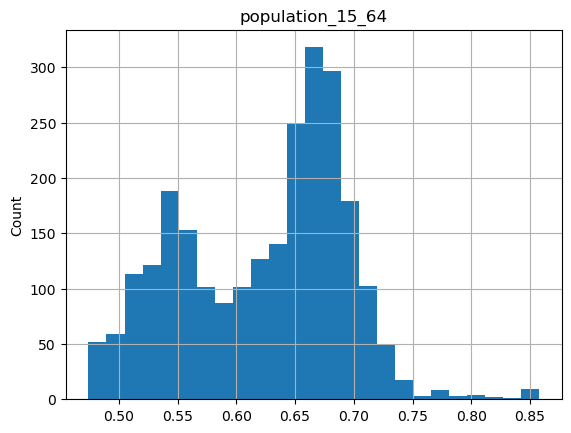

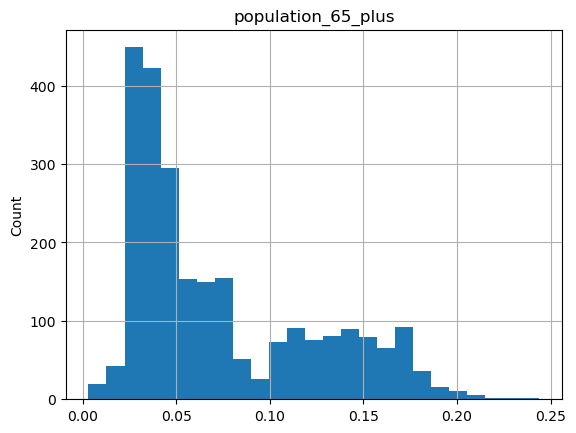

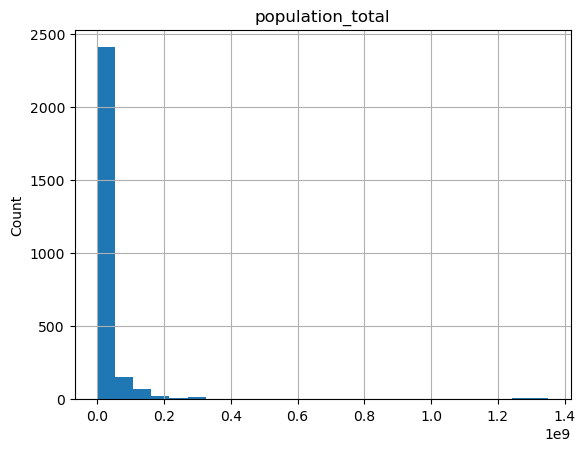

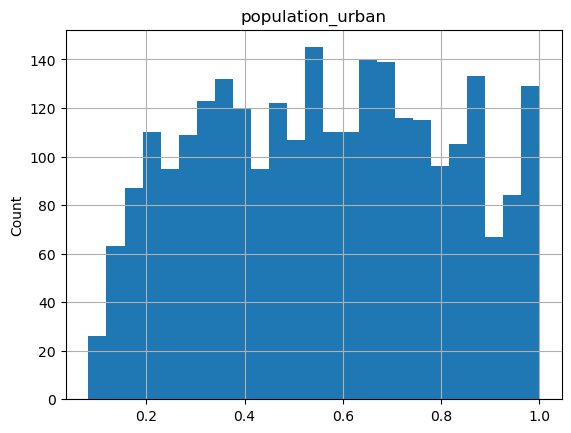

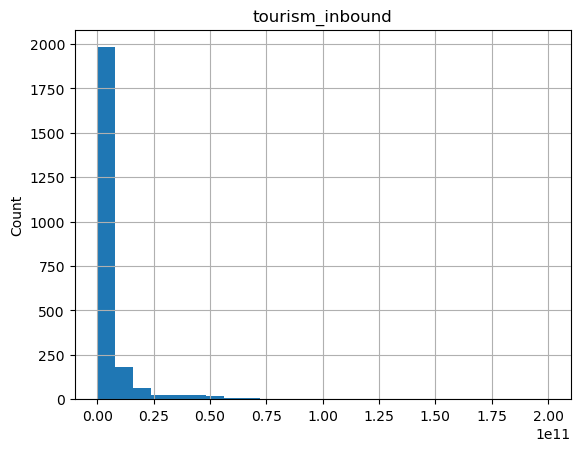

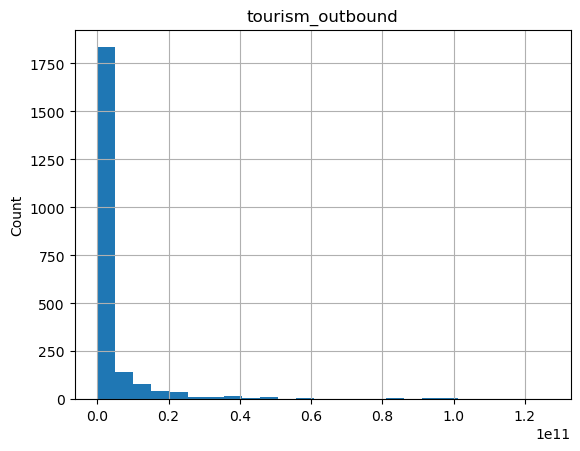

In [16]:
for i in features:

    world_2[i].hist(bins=25)
    plt.ylabel('Count')
    plt.title(i)
    plt.show()

## Interpretations on Skewness of Features

* lending_interest, GDP, population_total, co2_emission, days_to_start_business, tourism_inbound, energy_usage, tourism_outbound features are highly skewed

* Need to find a way to reduce the skewness for the above mentioned features

# Before imputation let us check for outliers using boxplot and histograms

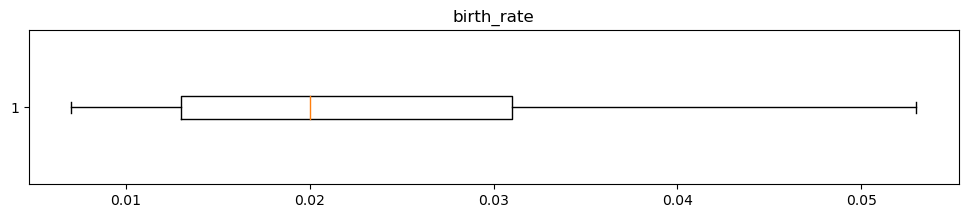

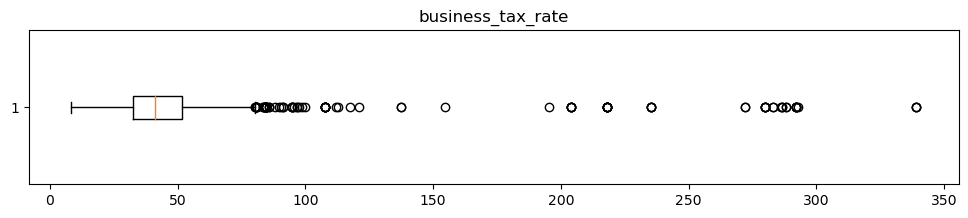

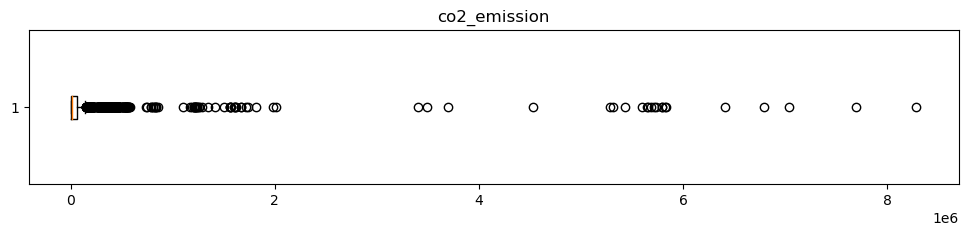

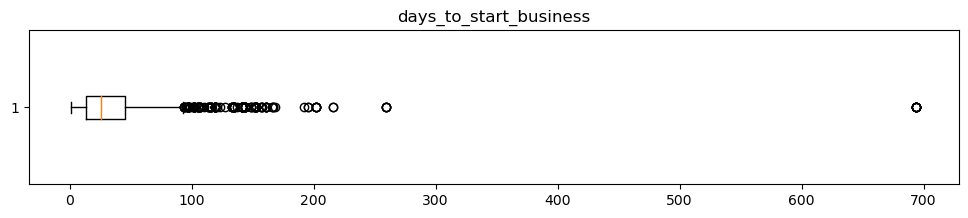

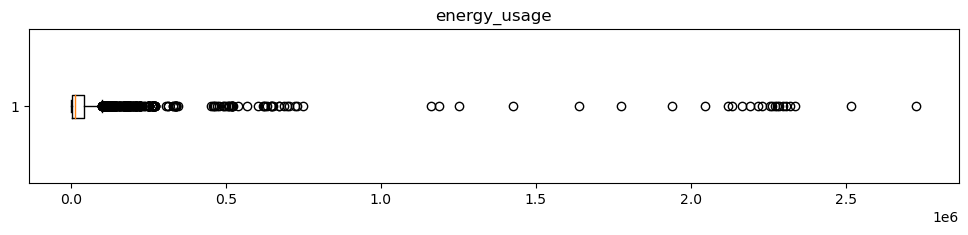

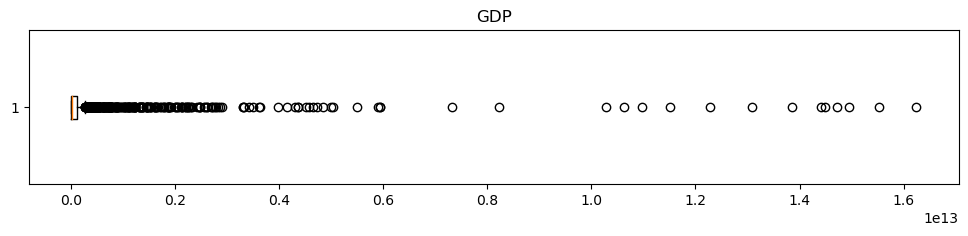

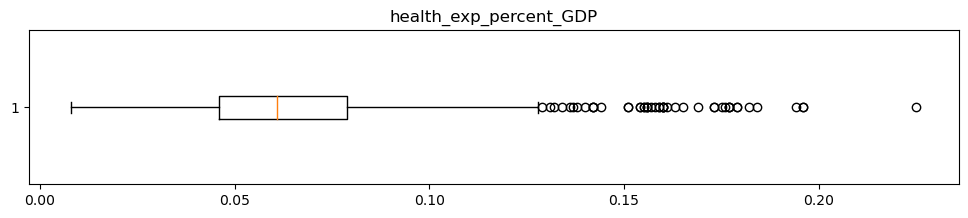

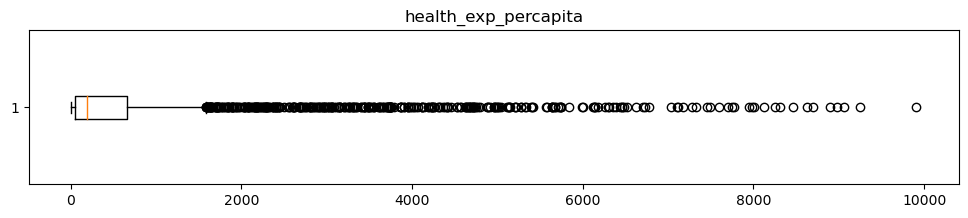

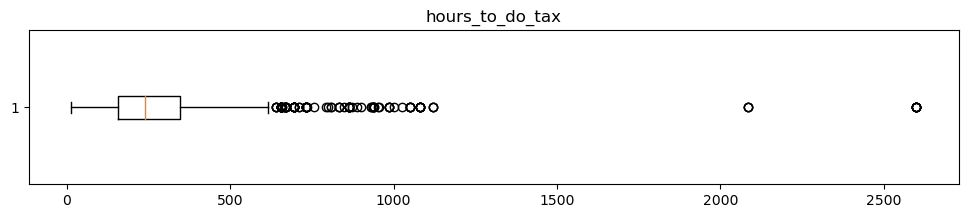

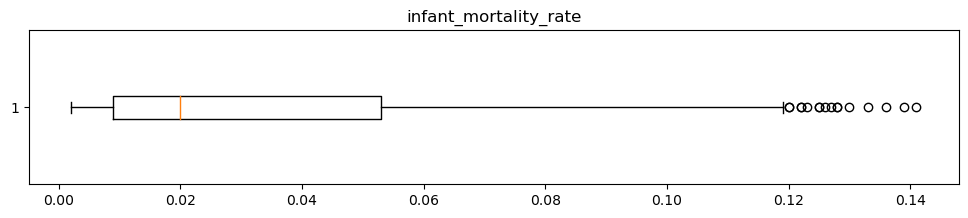

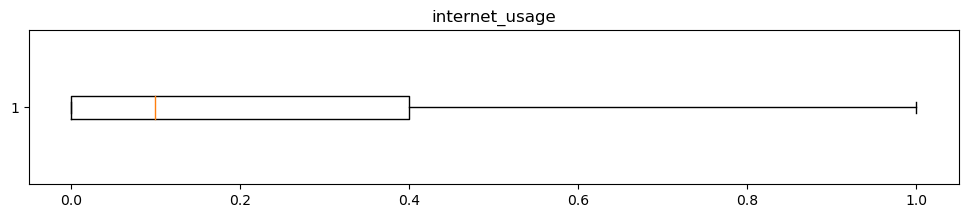

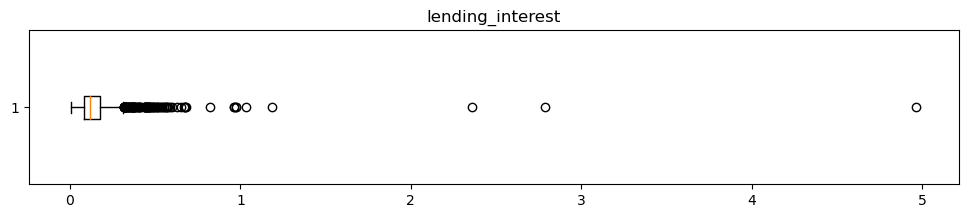

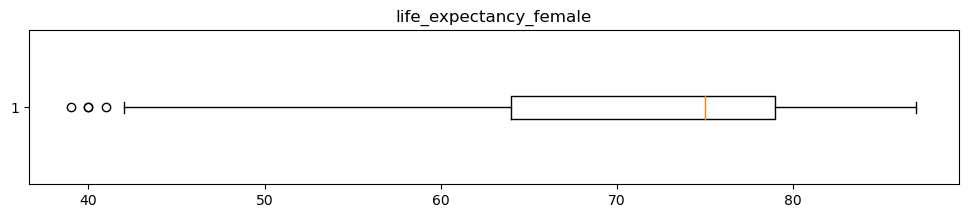

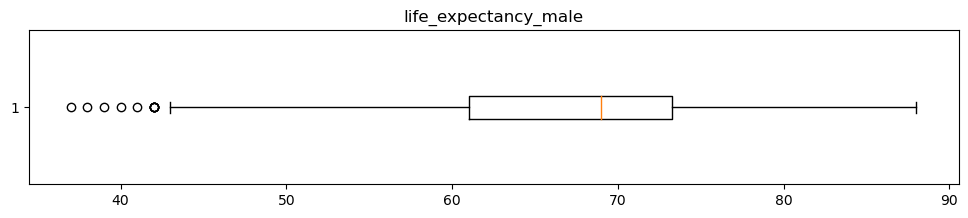

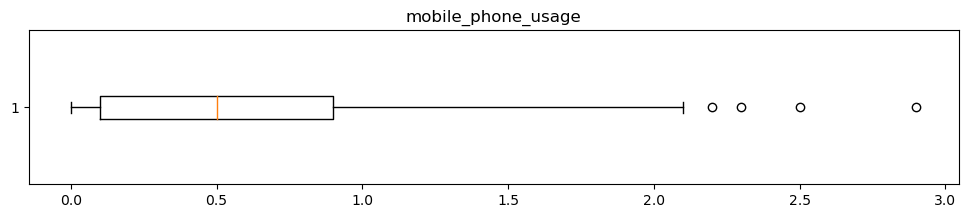

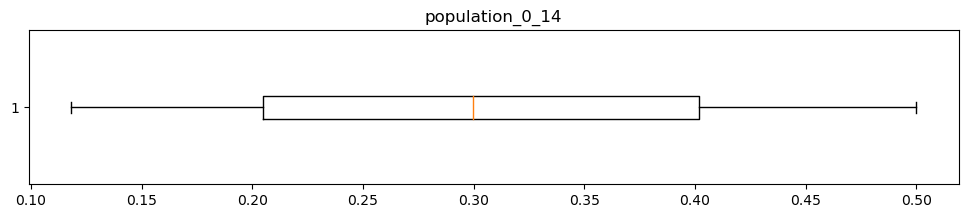

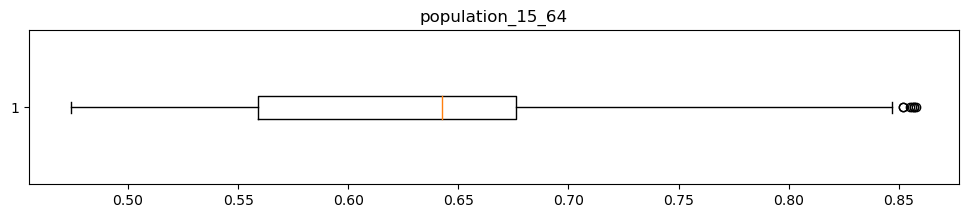

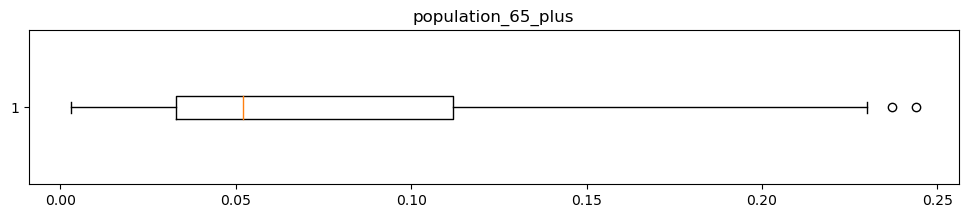

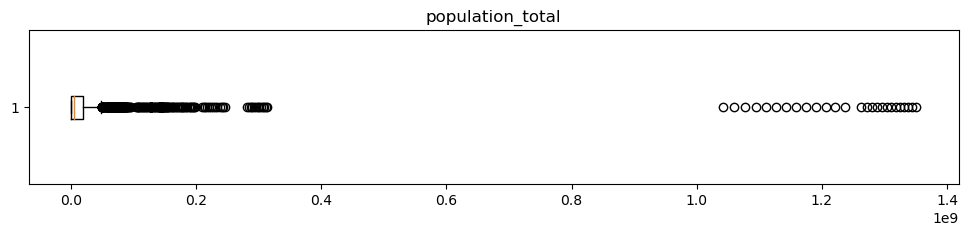

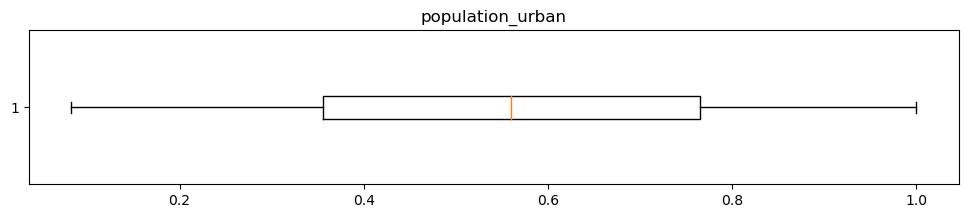

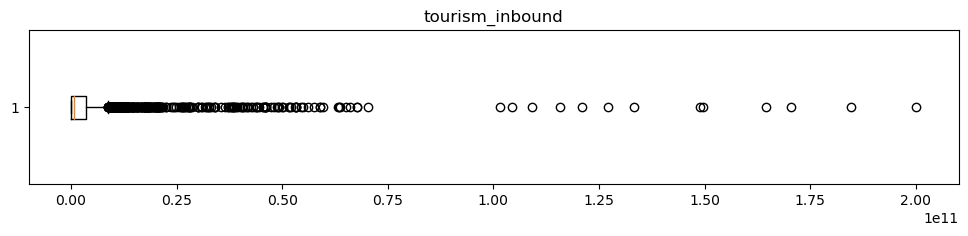

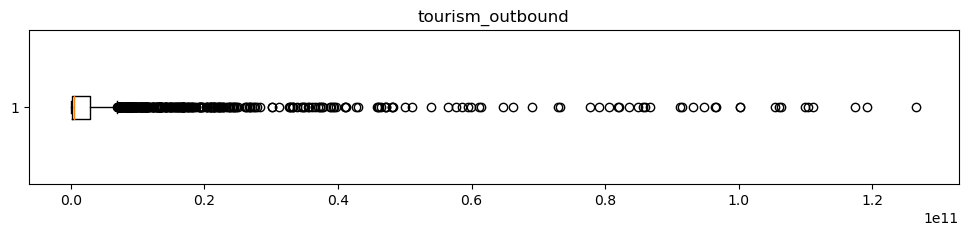

In [17]:
for i in features:
    plt.figure(figsize=(12,2))
    plt.boxplot(world_2[i].dropna(),vert=False,)
    plt.title(i)
    plt.show()

## Interpretations on Boxplots
* business_tax_rate, co2_emission, days_to_start_business, energy_usage, GDP, health_exp%_GDP, health_exp_percapita, hours_to_do tax, population_total, tourism_inbound, tourism_outbound are having more number of Outliers

* infant_mortality_rate, life_expectancy_female, life_expectancy_male, moble_phone_usage, population_15_64, population_65+ are having few number of Outliers

* The boxplots of Birth Rate,Ease of Business ,Mobile Phone Usage,Internet Usage,Infant Mortality Rate,Life Expectancy Female,Life Expectancy Male,,Population 0-14,Population 15-64,Population 65+, Population Urban looks fine.

*  few outliers are detected but it make sense as it is global data and not much deviated from the actual values.

*  max(Business Tax Rate) is around 340% , which means paying 340 rupees as tax for every 100 rupees profit. The global highest Business Tax Rate is around 55% , so assuming the max value to be 60% and replacing all the ouliers (i.e., above 60%) with np.nan and will fill them later using imputation techniques

*  max(Days to Start Business) is 694 days. Accounting 18-20 business days a month it takes like around 3 years , comparing it to real time global values the max time required to start a business is around 50 days.Based on the boxplot assuming the max days to start a business is 80 days and replacing all the outliers with np.nan and will figure a way to fill them up with sensible number later based on all other parameters

*  Based on the boxplot assuming 600 hours as max(hours to do tax ) and replacing all the outliers with np.nan and will figure a way to fill them up with sensible number later based on all other parameters.

In [18]:
world_2['business_tax_rate'] =np.where(world_2['business_tax_rate']>60 ,np.nan,world_2['business_tax_rate'])
world_2['days_to_start_business'] =np.where(world_2['days_to_start_business']>80 ,np.nan,world_2['days_to_start_business'])
world_2['hours_to_do_tax'] =np.where(world_2['hours_to_do_tax']>600 ,np.nan,world_2['hours_to_do_tax'])

###  Note:  Removing outliers of the business_tax_rate, days_to_start_business, hours_to_do_tax. there is no sense as the feature values are practically taken from the real world and depends on the population and gdp of the countries which varey significantly from one another
  

In [19]:
# Calculating percentage of missing/null values
percent_missing =  world_2.isnull().sum() * 100 / len(world_2)
percent_missing.sort_values(ascending=False)

business_tax_rate         56.102071
hours_to_do_tax           52.218935
days_to_start_business    42.899408
energy_usage              33.986686
lending_interest          30.473373
co2_emission              21.412722
tourism_outbound          17.418639
tourism_inbound           13.609467
health_exp_percent_GDP    11.427515
health_exp_percapita      11.427515
infant_mortality_rate      9.615385
population_0_14            8.136095
population_65_plus         8.136095
population_15_64           8.136095
GDP                        7.766272
internet_usage             6.397929
mobile_phone_usage         6.176036
life_expectancy_male       5.029586
life_expectancy_female     5.029586
birth_rate                 4.400888
population_urban           0.961538
population_total           0.000000
country                    0.000000
dtype: float64

## Interpretations on Missing Values
* Most of the features are having missing values.

* hours_to_do tax, business_tax_rate, days_to_start_business, energy_usage, lending_interest are the top 5 features with highest percentage of missing values.

In [20]:
# Describing the data
world_2.describe().T

,count,mean,std,min,25%,50%,75%,max
birth_rate,2585.0,2.271489e-02,1.133843e-02,7.000000e-03,1.300000e-02,2.000000e-02,3.100000e-02,5.300000e-02
business_tax_rate,1187.0,3.724120e+01,1.142739e+01,8.200000e+00,3.040000e+01,3.780000e+01,4.545000e+01,6.000000e+01
co2_emission,2125.0,1.423071e+05,6.159288e+05,7.000000e+00,1.360000e+03,8.529000e+03,5.910800e+04,8.286892e+06
days_to_start_business,1544.0,2.738536e+01,1.818223e+01,1.000000e+00,1.300000e+01,2.400000e+01,3.900000e+01,8.000000e+01
energy_usage,1785.0,7.723684e+04,2.599239e+05,8.000000e+00,3.737000e+03,1.433800e+04,4.185200e+04,2.727728e+06
GDP,2494.0,2.638540e+11,1.129910e+12,6.310127e+07,3.539042e+09,1.507975e+10,1.102047e+11,1.624460e+13
health_exp_percent_GDP,2395.0,6.416952e-02,2.632460e-02,8.000000e-03,4.600000e-02,6.100000e-02,7.900000e-02,2.250000e-01
health_exp_percapita,2395.0,8.013971e+02,1.473448e+03,2.000000e+00,5.000000e+01,1.930000e+02,6.650000e+02,9.908000e+03
hours_to_do_tax,1292.0,2.408816e+02,1.215969e+02,1.200000e+01,1.470000e+02,2.240000e+02,3.200000e+02,6.000000e+02
infant_mortality_rate,2444.0,3.281301e-02,2.996760e-02,2.000000e-03,9.000000e-03,2.000000e-02,5.300000e-02,1.410000e-01


# Country & Feature wise Mean Imputation
* Imputing missing values with country and feature wise mean, as if the imputation is done through the mean of feature may mislead the data.

In [21]:
for i in world_2.columns:
    null_df = world_2[world_2[i].isnull()]
    print(i, " is having missing values from ", null_df['country'].nunique(), " countries.")
    print("--------------------------------------------------------------------------------")

birth_rate  is having missing values from  13  countries.
--------------------------------------------------------------------------------
business_tax_rate  is having missing values from  208  countries.
--------------------------------------------------------------------------------
co2_emission  is having missing values from  208  countries.
--------------------------------------------------------------------------------
country  is having missing values from  0  countries.
--------------------------------------------------------------------------------
days_to_start_business  is having missing values from  208  countries.
--------------------------------------------------------------------------------
energy_usage  is having missing values from  174  countries.
--------------------------------------------------------------------------------
GDP  is having missing values from  26  countries.
--------------------------------------------------------------------------------
health_exp_

In [22]:
world_fill_mean_na = world_2.copy()

In [23]:
mean_fill_cols = world_fill_mean_na.drop(columns=['country', 'population_total']).columns

In [24]:
final_df_after_mean_imputation = pd.DataFrame()
for col in mean_fill_cols:
    fill_na_df = world_fill_mean_na[['country', col]]
    fill_na_df[col] = fill_na_df.groupby("country")[col].transform(lambda x: x.fillna(x.mean()))
    final_df_after_mean_imputation = pd.concat([final_df_after_mean_imputation, fill_na_df], axis=1)

In [25]:
final_df_after_mean_imputation.shape  

(2704, 42)

In [26]:
final_df_after_mean_imputation = final_df_after_mean_imputation.drop(columns=['country'])

In [27]:
final_df_after_mean_imputation['country'] = world_fill_mean_na['country']
final_df_after_mean_imputation['population_total'] = world_fill_mean_na['population_total']

In [28]:
final_df_after_mean_imputation.head()

,birth_rate,business_tax_rate,co2_emission,days_to_start_business,energy_usage,GDP,health_exp_percent_GDP,health_exp_percapita,hours_to_do_tax,infant_mortality_rate,...,life_expectancy_male,mobile_phone_usage,population_0_14,population_15_64,population_65_plus,population_urban,tourism_inbound,tourism_outbound,country,population_total
0,0.020,NaN,87931.0,25.0,26998.0,5.479006e+10,0.035,60.0,451.00,0.034,...,67.0,0.0,0.342,0.619,0.039,0.599,102000000.0,193000000.0,Algeria,31719449
1,0.050,52.1000,9542.0,66.8,7499.0,9.129595e+09,0.034,22.0,275.75,0.128,...,44.0,0.0,0.476,0.499,0.025,0.324,34000000.0,146000000.0,Angola,13924930
2,0.043,NaN,1617.0,30.4,1983.0,2.359122e+09,0.043,15.0,270.00,0.090,...,53.0,0.0,0.454,0.517,0.029,0.383,77000000.0,50000000.0,Benin,6949366
3,0.027,18.7250,4276.0,63.4,1836.0,5.788312e+09,0.047,152.0,144.50,0.054,...,49.0,0.1,0.383,0.587,0.029,0.532,227000000.0,209000000.0,Botswana,1755375
4,0.046,45.4875,1041.0,24.2,NaN,2.610959e+09,0.051,12.0,270.00,0.096,...,49.0,0.0,0.468,0.505,0.028,0.178,23000000.0,30000000.0,Burkina Faso,11607944


In [29]:
# Example of Country which is having null values for the entire feature
example_df = final_df_after_mean_imputation[['country', 'energy_usage']]
example_df[example_df['country'] == 'Afghanistan']

,country,energy_usage
53,Afghanistan,NaN
261,Afghanistan,NaN
469,Afghanistan,NaN
677,Afghanistan,NaN
885,Afghanistan,NaN
1093,Afghanistan,NaN
1301,Afghanistan,NaN
1509,Afghanistan,NaN
1717,Afghanistan,NaN
1925,Afghanistan,NaN


In [30]:
# Calculating percentage of missing/null values after imputing with country and feature wise mean
percent_missing =  final_df_after_mean_imputation.isnull().sum() * 100 / len(world_2)
percent_missing.sort_values(ascending=False)

business_tax_rate         22.115385
lending_interest          21.634615
energy_usage              19.711538
hours_to_do_tax           16.346154
days_to_start_business    15.865385
health_exp_percapita      11.057692
health_exp_percent_GDP    11.057692
tourism_outbound          10.576923
infant_mortality_rate      9.615385
tourism_inbound            7.692308
population_0_14            7.692308
population_15_64           7.692308
population_65_plus         7.692308
co2_emission               6.250000
GDP                        5.288462
internet_usage             4.326923
life_expectancy_female     2.403846
life_expectancy_male       2.403846
mobile_phone_usage         2.403846
birth_rate                 0.961538
population_urban           0.961538
country                    0.000000
population_total           0.000000
dtype: float64

In [31]:
final_df_after_mean_imputation.describe().T

,count,mean,std,min,25%,50%,75%,max
birth_rate,2678.0,2.250511e-02,1.126928e-02,7.000000e-03,1.300000e-02,2.000000e-02,3.000000e-02,5.300000e-02
business_tax_rate,2106.0,3.760067e+01,1.139510e+01,8.200000e+00,3.090000e+01,3.820000e+01,4.550000e+01,6.000000e+01
co2_emission,2535.0,1.411257e+05,6.113068e+05,7.000000e+00,1.358500e+03,8.196000e+03,5.852550e+04,8.286892e+06
days_to_start_business,2275.0,2.846583e+01,1.816596e+01,1.000000e+00,1.400000e+01,2.500000e+01,4.000000e+01,8.000000e+01
energy_usage,2171.0,6.614570e+04,2.410321e+05,8.000000e+00,2.262500e+03,9.308000e+03,3.255450e+04,2.727728e+06
GDP,2561.0,2.573031e+11,1.115751e+12,6.310127e+07,3.414053e+09,1.443393e+10,1.031987e+11,1.624460e+13
health_exp_percent_GDP,2405.0,6.405098e-02,2.639619e-02,8.000000e-03,4.500000e-02,6.100000e-02,7.900000e-02,2.250000e-01
health_exp_percapita,2405.0,7.981935e+02,1.471216e+03,2.000000e+00,5.000000e+01,1.910000e+02,6.640000e+02,9.908000e+03
hours_to_do_tax,2262.0,2.432927e+02,1.232388e+02,1.200000e+01,1.498750e+02,2.260000e+02,3.205625e+02,6.000000e+02
infant_mortality_rate,2444.0,3.281301e-02,2.996760e-02,2.000000e-03,9.000000e-03,2.000000e-02,5.300000e-02,1.410000e-01


# Median Imputation

In [32]:
median_data = final_df_after_mean_imputation.drop(columns = ["country"],axis=1)
median_data.fillna(median_data.median(), inplace=True)

### Whichever countries having null values for the entire feature, imputing those countries with median value of that feature from all the countries.

In [33]:
median_data.describe().T

,count,mean,std,min,25%,50%,75%,max
birth_rate,2704.0,2.248102e-02,1.121762e-02,7.000000e-03,1.300000e-02,2.000000e-02,3.000000e-02,5.300000e-02
business_tax_rate,2704.0,3.773321e+01,1.005898e+01,8.200000e+00,3.340000e+01,3.820000e+01,4.390000e+01,6.000000e+01
co2_emission,2704.0,1.328176e+05,5.927623e+05,7.000000e+00,1.566000e+03,8.196000e+03,5.422825e+04,8.286892e+06
days_to_start_business,2704.0,2.791596e+01,1.671019e+01,1.000000e+00,1.600000e+01,2.500000e+01,3.700000e+01,8.000000e+01
energy_usage,2704.0,5.494211e+04,2.171450e+05,8.000000e+00,3.019500e+03,9.308000e+03,2.524700e+04,2.727728e+06
GDP,2704.0,2.444591e+11,1.087196e+12,6.310127e+07,3.627316e+09,1.443393e+10,9.281036e+10,1.624460e+13
health_exp_percent_GDP,2704.0,6.371362e-02,2.491185e-02,8.000000e-03,4.775000e-02,6.100000e-02,7.600000e-02,2.250000e-01
health_exp_percapita,2704.0,7.310519e+02,1.400472e+03,2.000000e+00,5.700000e+01,1.910000e+02,5.512500e+02,9.908000e+03
hours_to_do_tax,2704.0,2.404660e+02,1.128945e+02,1.200000e+01,1.640000e+02,2.260000e+02,2.980000e+02,6.000000e+02
infant_mortality_rate,2704.0,3.158099e-02,2.873929e-02,2.000000e-03,1.000000e-02,2.000000e-02,4.900000e-02,1.410000e-01


In [34]:
median_data['country'] = final_df_after_mean_imputation['country']

In [35]:
median_data.head()

,birth_rate,business_tax_rate,co2_emission,days_to_start_business,energy_usage,GDP,health_exp_percent_GDP,health_exp_percapita,hours_to_do_tax,infant_mortality_rate,...,life_expectancy_male,mobile_phone_usage,population_0_14,population_15_64,population_65_plus,population_urban,tourism_inbound,tourism_outbound,population_total,country
0,0.020,38.2000,87931.0,25.0,26998.0,5.479006e+10,0.035,60.0,451.00,0.034,...,67.0,0.0,0.342,0.619,0.039,0.599,102000000.0,193000000.0,31719449,Algeria
1,0.050,52.1000,9542.0,66.8,7499.0,9.129595e+09,0.034,22.0,275.75,0.128,...,44.0,0.0,0.476,0.499,0.025,0.324,34000000.0,146000000.0,13924930,Angola
2,0.043,38.2000,1617.0,30.4,1983.0,2.359122e+09,0.043,15.0,270.00,0.090,...,53.0,0.0,0.454,0.517,0.029,0.383,77000000.0,50000000.0,6949366,Benin
3,0.027,18.7250,4276.0,63.4,1836.0,5.788312e+09,0.047,152.0,144.50,0.054,...,49.0,0.1,0.383,0.587,0.029,0.532,227000000.0,209000000.0,1755375,Botswana
4,0.046,45.4875,1041.0,24.2,9308.0,2.610959e+09,0.051,12.0,270.00,0.096,...,49.0,0.0,0.468,0.505,0.028,0.178,23000000.0,30000000.0,11607944,Burkina Faso


In [36]:
median_data.isnull().sum()

birth_rate                0
business_tax_rate         0
co2_emission              0
days_to_start_business    0
energy_usage              0
GDP                       0
health_exp_percent_GDP    0
health_exp_percapita      0
hours_to_do_tax           0
infant_mortality_rate     0
internet_usage            0
lending_interest          0
life_expectancy_female    0
life_expectancy_male      0
mobile_phone_usage        0
population_0_14           0
population_15_64          0
population_65_plus        0
population_urban          0
tourism_inbound           0
tourism_outbound          0
population_total          0
country                   0
dtype: int64

median imputation is giving better results, hence going ahead with median imputation

In [37]:
data_after_imputation = median_data[['birth_rate', 'business_tax_rate', 'co2_emission', 'country',
       'days_to_start_business', 'energy_usage', 'GDP', 'health_exp_percent_GDP',
       'health_exp_percapita', 'hours_to_do_tax', 'infant_mortality_rate',
       'internet_usage', 'lending_interest', 'life_expectancy_female',
       'life_expectancy_male', 'mobile_phone_usage', 'population_0_14',
       'population_15_64', 'population_65_plus', 'population_total',
       'population_urban', 'tourism_inbound', 'tourism_outbound']]


### Data Sanity Check

In [38]:
pd.set_option('display.max_columns', None)
world_2.head()

,birth_rate,business_tax_rate,co2_emission,country,days_to_start_business,energy_usage,GDP,health_exp_percent_GDP,health_exp_percapita,hours_to_do_tax,infant_mortality_rate,internet_usage,lending_interest,life_expectancy_female,life_expectancy_male,mobile_phone_usage,population_0_14,population_15_64,population_65_plus,population_total,population_urban,tourism_inbound,tourism_outbound
0,0.020,NaN,87931.0,Algeria,NaN,26998.0,5.479006e+10,0.035,60.0,NaN,0.034,0.0,0.100,71.0,67.0,0.0,0.342,0.619,0.039,31719449,0.599,102000000.0,193000000.0
1,0.050,NaN,9542.0,Angola,NaN,7499.0,9.129595e+09,0.034,22.0,NaN,0.128,0.0,1.032,47.0,44.0,0.0,0.476,0.499,0.025,13924930,0.324,34000000.0,146000000.0
2,0.043,NaN,1617.0,Benin,NaN,1983.0,2.359122e+09,0.043,15.0,NaN,0.090,0.0,NaN,57.0,53.0,0.0,0.454,0.517,0.029,6949366,0.383,77000000.0,50000000.0
3,0.027,NaN,4276.0,Botswana,NaN,1836.0,5.788312e+09,0.047,152.0,NaN,0.054,0.0,0.155,52.0,49.0,0.1,0.383,0.587,0.029,1755375,0.532,227000000.0,209000000.0
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,2.610959e+09,0.051,12.0,NaN,0.096,0.0,NaN,52.0,49.0,0.0,0.468,0.505,0.028,11607944,0.178,23000000.0,30000000.0


In [39]:
data_after_imputation.duplicated().sum()

0

In [40]:
world_development_final_data =  data_after_imputation.copy()

In [41]:
world_development_final_data.skew().sort_values(ascending=False)

lending_interest          14.495556
GDP                        9.809329
co2_emission               8.898981
population_total           8.788164
energy_usage               8.498863
tourism_inbound            7.628269
tourism_outbound           5.744612
health_exp_percapita       3.047036
health_exp_percent_GDP     1.273775
infant_mortality_rate      1.195218
population_65_plus         1.035586
internet_usage             1.008266
days_to_start_business     0.907660
hours_to_do_tax            0.717886
birth_rate                 0.704461
mobile_phone_usage         0.611812
population_0_14            0.077170
population_urban           0.012928
population_15_64          -0.264664
business_tax_rate         -0.511799
life_expectancy_male      -0.757175
life_expectancy_female    -0.949727
dtype: float64

# Boxplots after Imputation

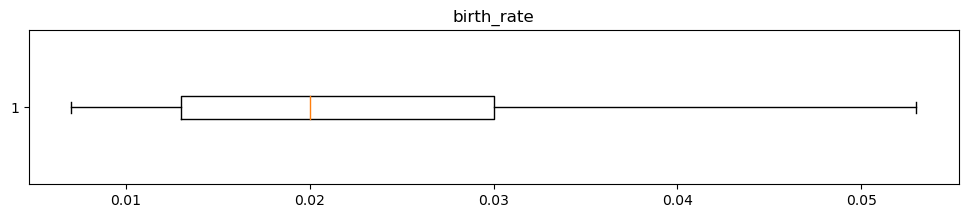

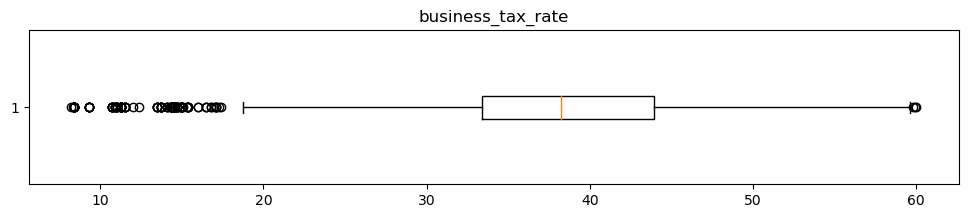

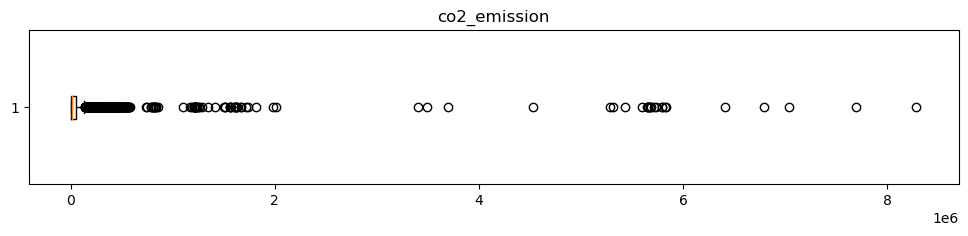

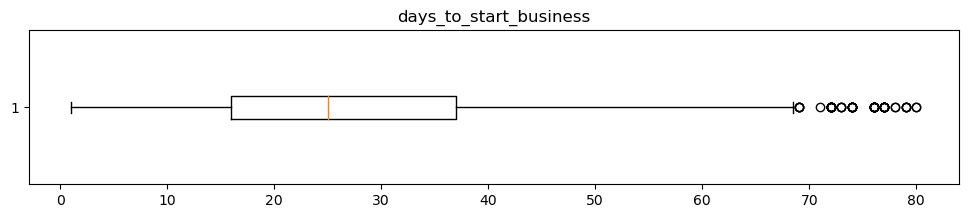

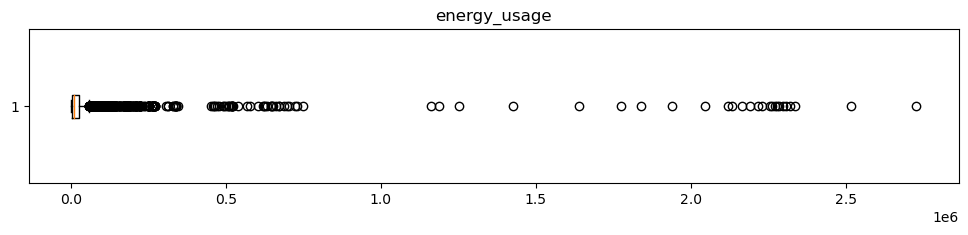

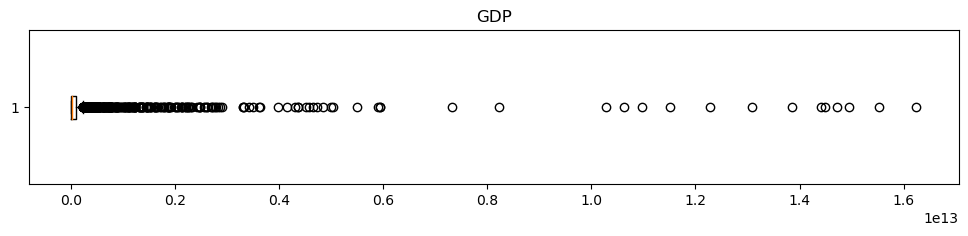

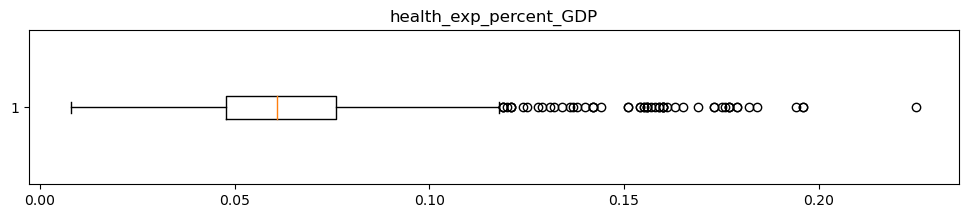

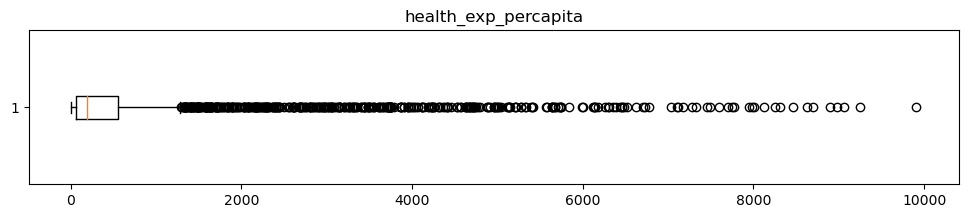

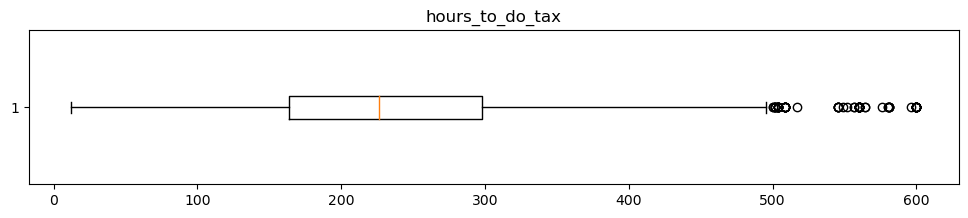

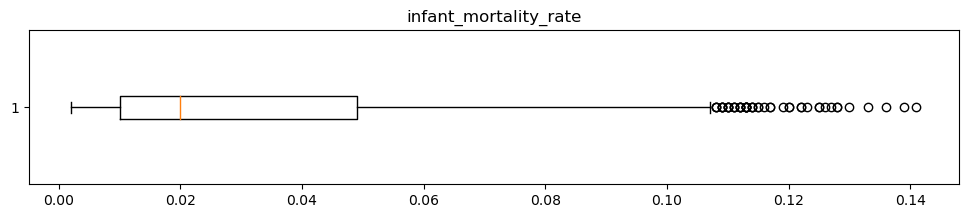

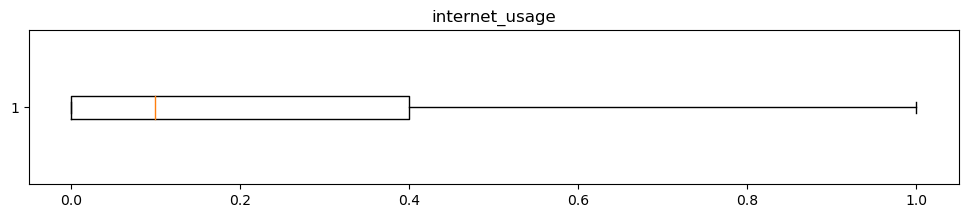

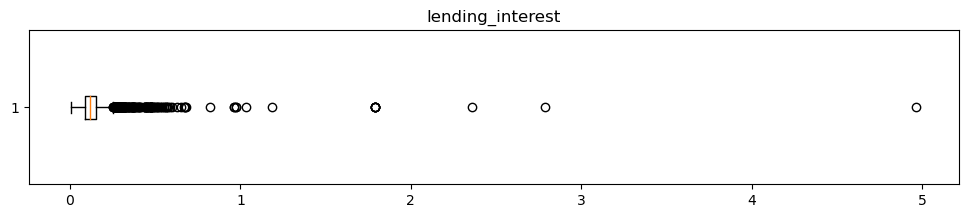

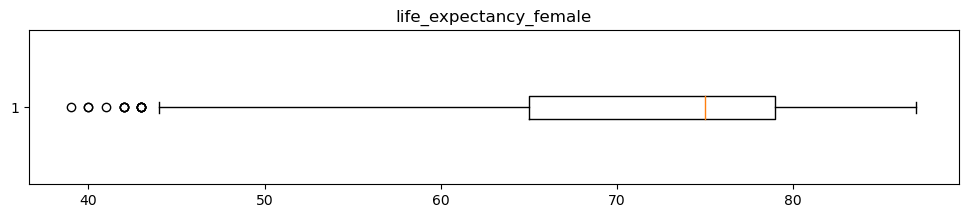

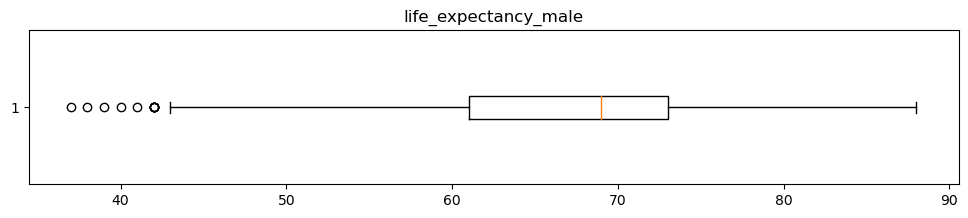

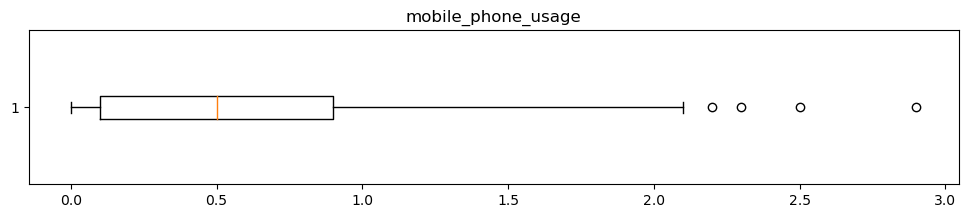

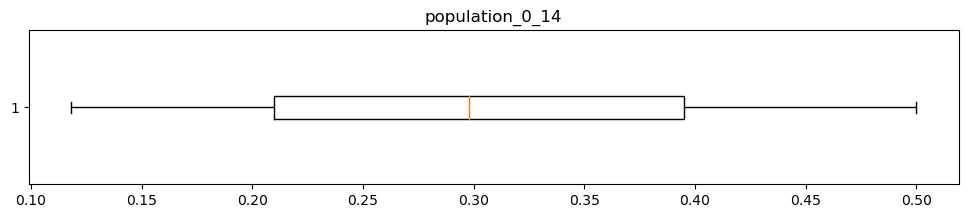

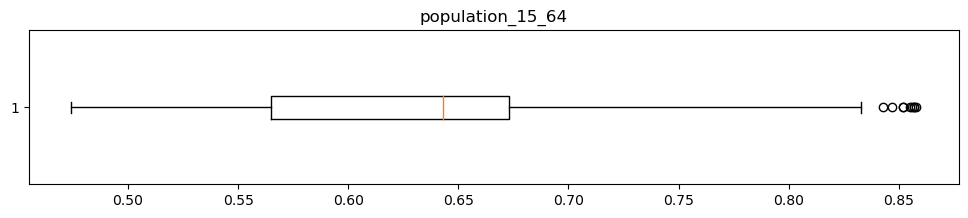

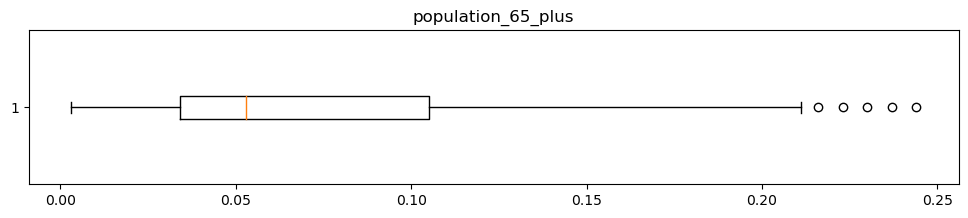

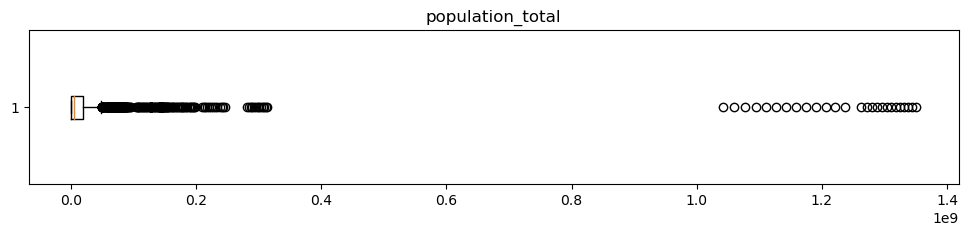

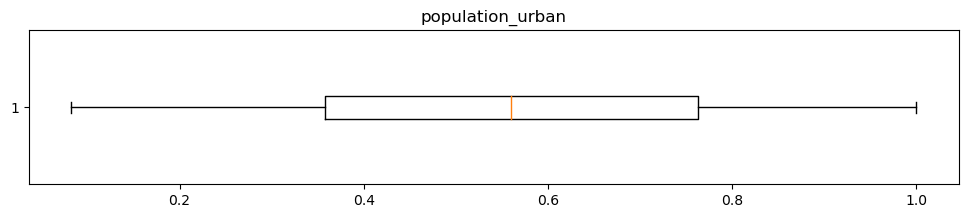

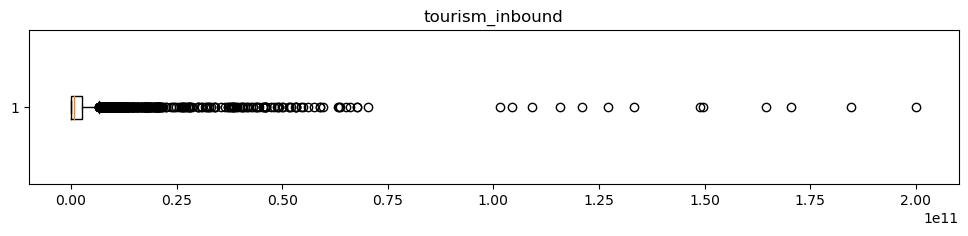

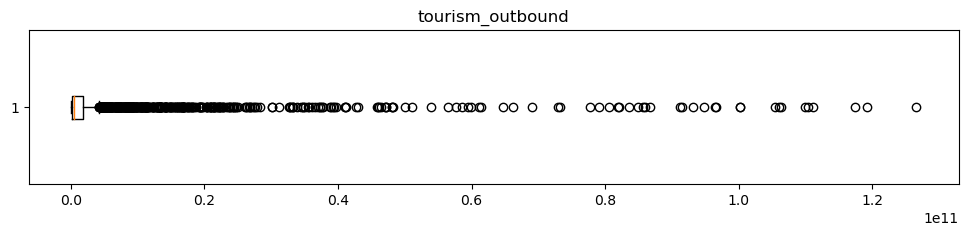

In [42]:
features = world_development_final_data.drop(columns="country",axis=1)
for i in features:
    plt.figure(figsize=(12,2))
    plt.boxplot(world_development_final_data[i].dropna(),vert=False,)
    plt.title(i)
    plt.show()

# Data Transformations

In [43]:
# Data Transformtions
world_development_final_data['lending_interest'] = np.log(world_development_final_data['lending_interest'])
world_development_final_data[['GDP', 'co2_emission', 'population_total', 'energy_usage', 'tourism_inbound', 'tourism_outbound']] = np.sqrt(world_development_final_data[['GDP', 'co2_emission', 'population_total', 'energy_usage', 'tourism_inbound', 'tourism_outbound']])

* Applying log transformation for lending_interest feature
* Applying Square root transformation for 'GDP', 'co2_emission', 'population_total', 'energy_usage', 'tourism_inbound', 'tourism_outbound' features

In [44]:
world_development_final_data.skew().sort_values(ascending=False)

co2_emission              4.304956
GDP                       4.227163
energy_usage              4.159587
population_total          4.144187
health_exp_percapita      3.047036
tourism_outbound          2.896898
tourism_inbound           2.839235
health_exp_percent_GDP    1.273775
infant_mortality_rate     1.195218
population_65_plus        1.035586
internet_usage            1.008266
days_to_start_business    0.907660
hours_to_do_tax           0.717886
birth_rate                0.704461
mobile_phone_usage        0.611812
lending_interest          0.253841
population_0_14           0.077170
population_urban          0.012928
population_15_64         -0.264664
business_tax_rate        -0.511799
life_expectancy_male     -0.757175
life_expectancy_female   -0.949727
dtype: float64

In [45]:
# Correaltion matrix
world_development_final_data.corr()

,birth_rate,business_tax_rate,co2_emission,days_to_start_business,energy_usage,GDP,health_exp_percent_GDP,health_exp_percapita,hours_to_do_tax,infant_mortality_rate,internet_usage,lending_interest,life_expectancy_female,life_expectancy_male,mobile_phone_usage,population_0_14,population_15_64,population_65_plus,population_total,population_urban,tourism_inbound,tourism_outbound
birth_rate,1.000000,-0.006124,-0.314506,0.256449,-0.257585,-0.327568,-0.179860,-0.406268,0.107637,0.865395,-0.636201,0.456631,-0.867966,-0.826354,-0.552372,0.933886,-0.899918,-0.729410,0.001529,-0.592388,-0.461584,-0.406906
business_tax_rate,-0.006124,1.000000,0.122462,0.051308,0.153580,0.138093,0.110635,0.020233,0.275845,0.071372,-0.008852,0.069805,-0.010939,-0.060216,-0.076883,-0.034273,-0.080019,0.183828,0.144708,-0.023095,0.118050,0.082582
co2_emission,-0.314506,0.122462,1.000000,-0.096994,0.980868,0.889202,0.160095,0.332205,0.126114,-0.260116,0.241764,-0.308755,0.264837,0.258890,0.156117,-0.369822,0.332401,0.329288,0.799924,0.231792,0.754312,0.800418
days_to_start_business,0.256449,0.051308,-0.096994,1.000000,-0.106299,-0.183654,-0.253554,-0.291279,0.175898,0.248384,-0.392722,0.232559,-0.302845,-0.319084,-0.330838,0.296779,-0.258154,-0.270144,0.068635,-0.261633,-0.256186,-0.234703
energy_usage,-0.257585,0.153580,0.980868,-0.106299,1.000000,0.902379,0.180966,0.341992,0.123500,-0.190977,0.242617,-0.282217,0.211418,0.208603,0.132854,-0.316928,0.269702,0.302850,0.814291,0.209269,0.753120,0.811992
GDP,-0.327568,0.138093,0.889202,-0.183654,0.902379,1.000000,0.319091,0.549802,0.024331,-0.303241,0.418661,-0.409970,0.331184,0.342796,0.277582,-0.410720,0.303013,0.457764,0.638185,0.315935,0.872729,0.930862
health_exp_percent_GDP,-0.179860,0.110635,0.160095,-0.253554,0.180966,0.319091,1.000000,0.445711,-0.060318,-0.164846,0.311423,-0.132014,0.175235,0.184270,0.155514,-0.265789,0.086240,0.446681,-0.027845,0.183547,0.346109,0.325794
health_exp_percapita,-0.406268,0.020233,0.332205,-0.291279,0.341992,0.549802,0.445711,1.000000,-0.284135,-0.427107,0.703686,-0.465429,0.437997,0.473990,0.413185,-0.478860,0.320363,0.573574,0.043883,0.439324,0.590673,0.627626
hours_to_do_tax,0.107637,0.275845,0.126114,0.175898,0.123500,0.024331,-0.060318,-0.284135,1.000000,0.196393,-0.266986,0.271768,-0.158090,-0.195173,-0.136463,0.106914,-0.165765,0.006993,0.246794,-0.134628,-0.053820,-0.084069
infant_mortality_rate,0.865395,0.071372,-0.260116,0.248384,-0.190977,-0.303241,-0.164846,-0.427107,0.196393,1.000000,-0.617776,0.480746,-0.921957,-0.900753,-0.570482,0.809257,-0.790834,-0.616351,0.068600,-0.594938,-0.432381,-0.380777


# Boxplots After Data Transformation

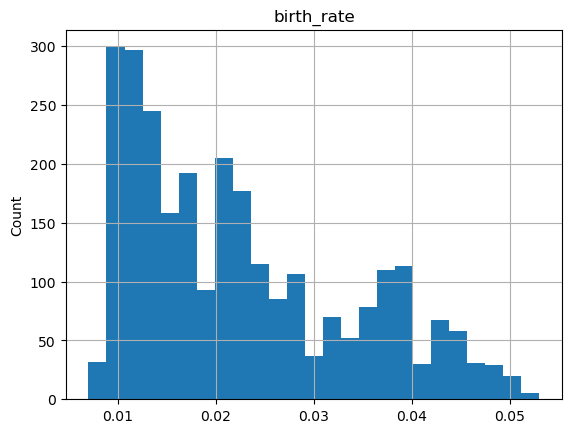

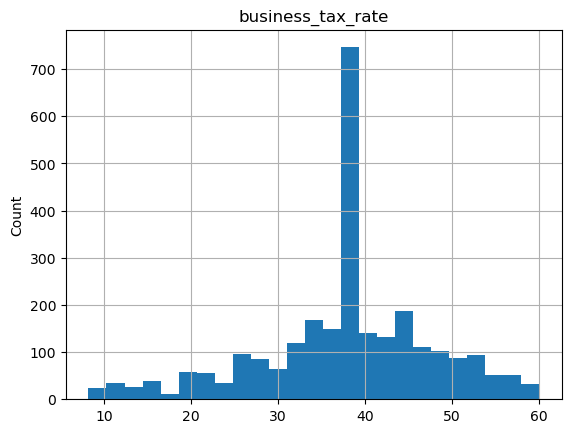

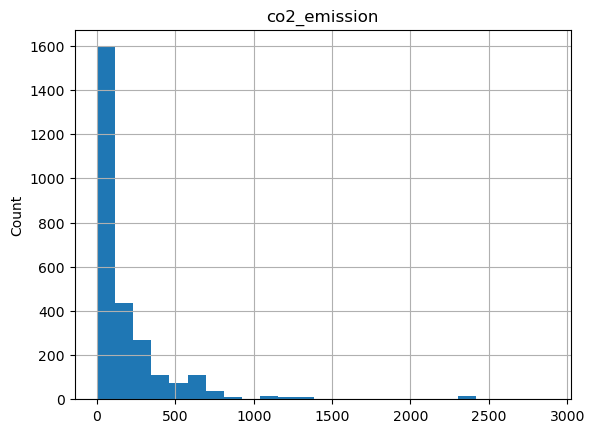

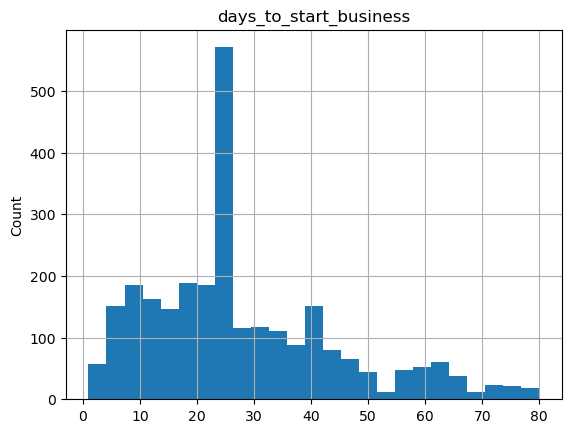

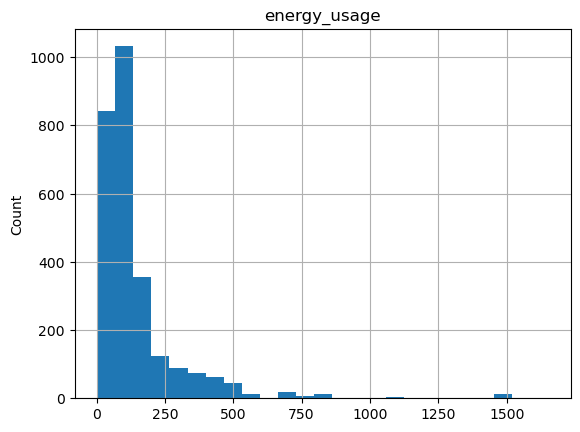

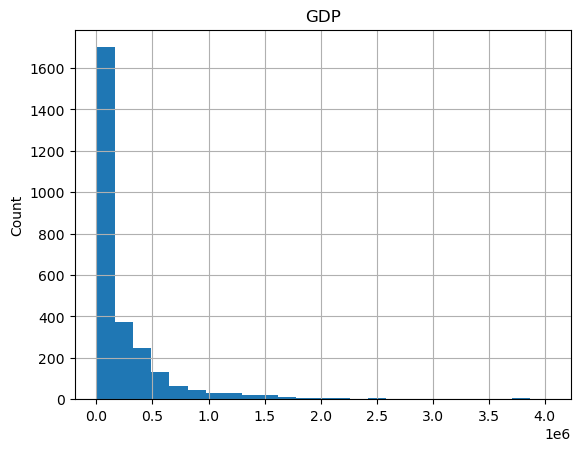

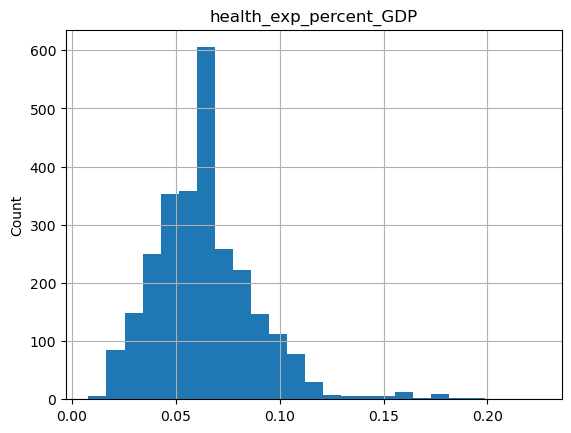

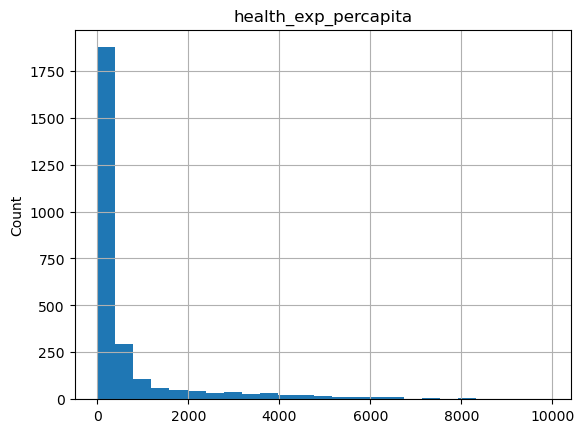

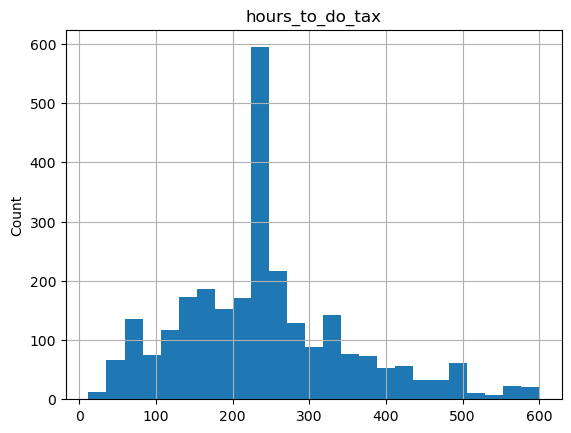

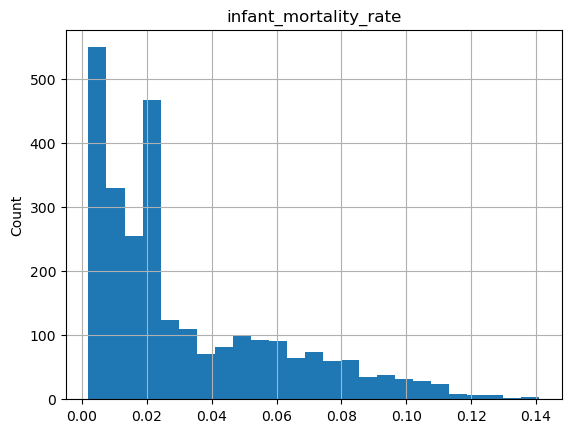

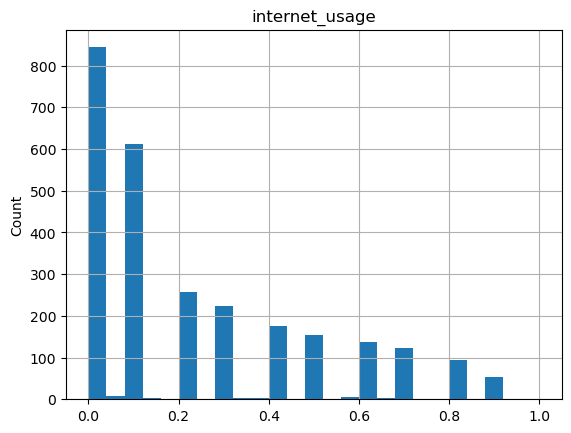

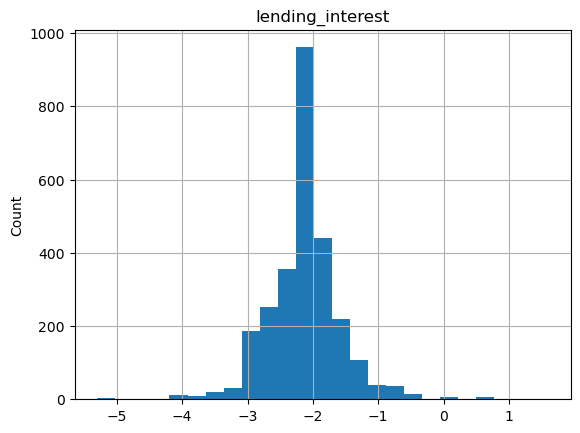

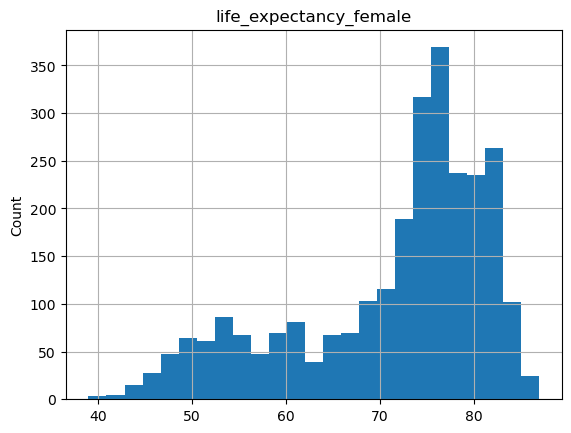

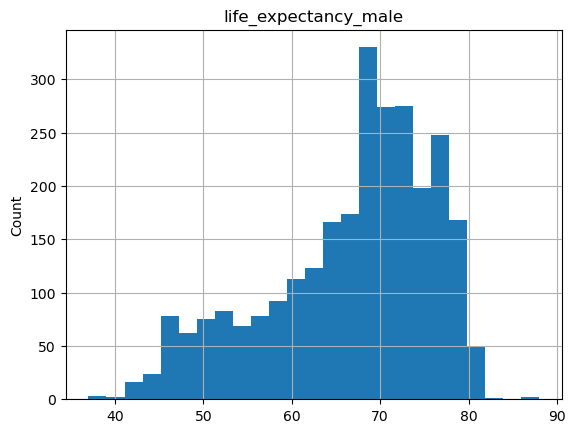

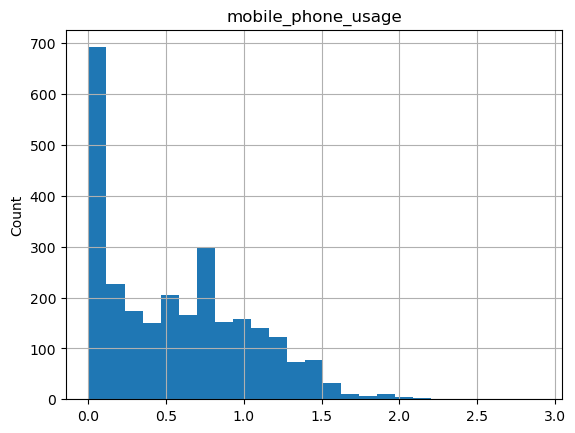

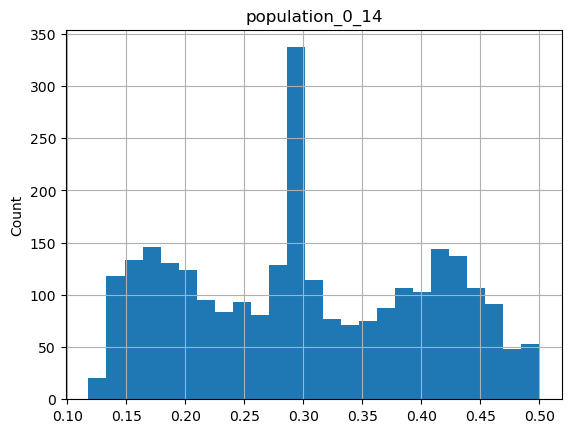

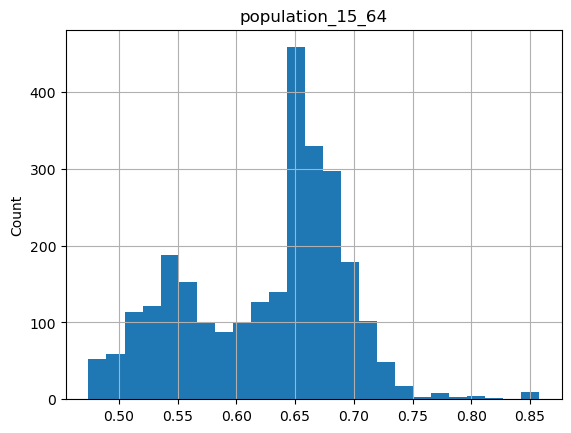

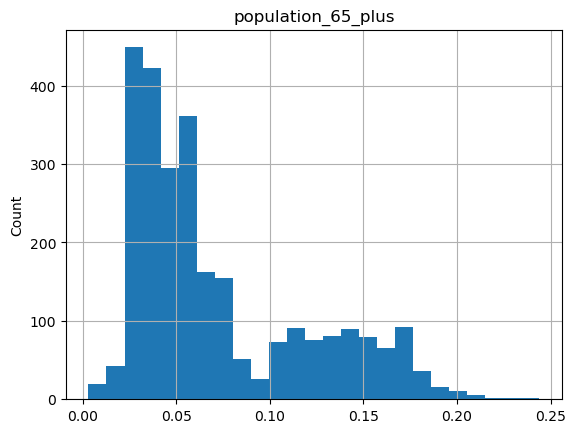

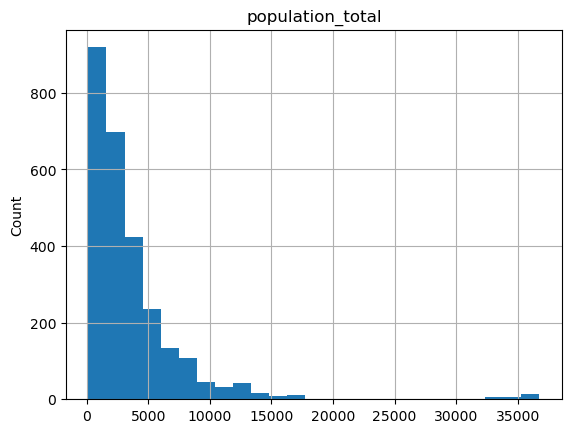

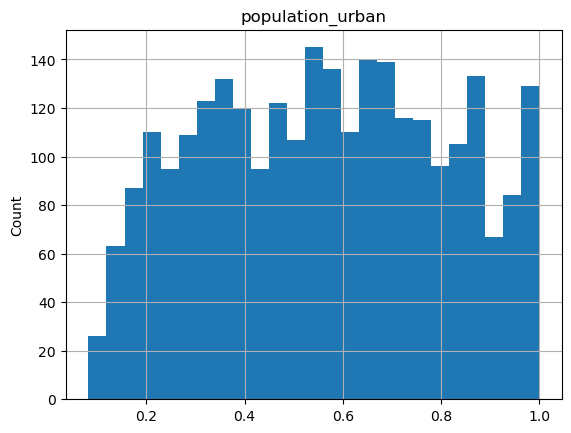

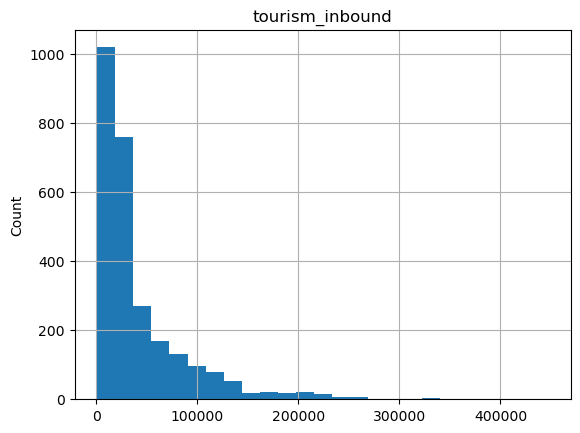

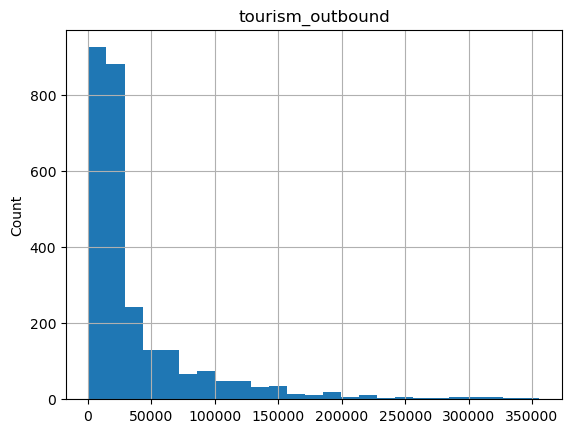

In [46]:
features_1 = world_development_final_data.drop(columns="country",axis=1)
# Histograms for numerical features
for i in features_1:
    world_development_final_data[i].hist(bins=25)
    plt.ylabel('Count')
    plt.title(i)
    plt.show()

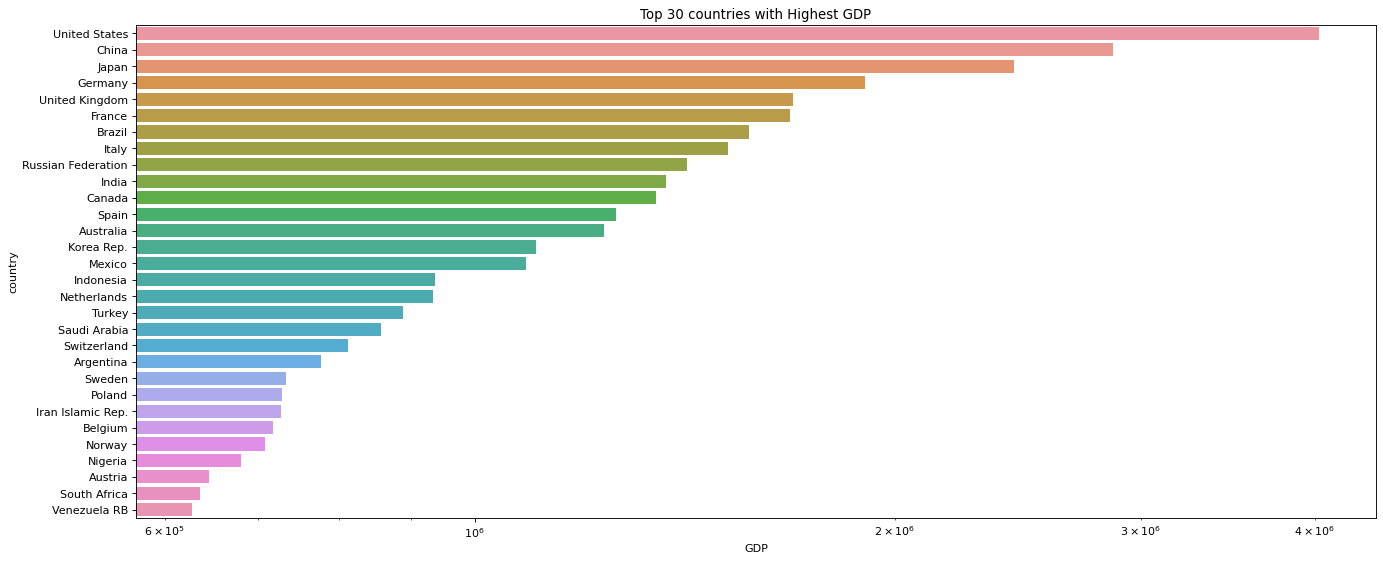

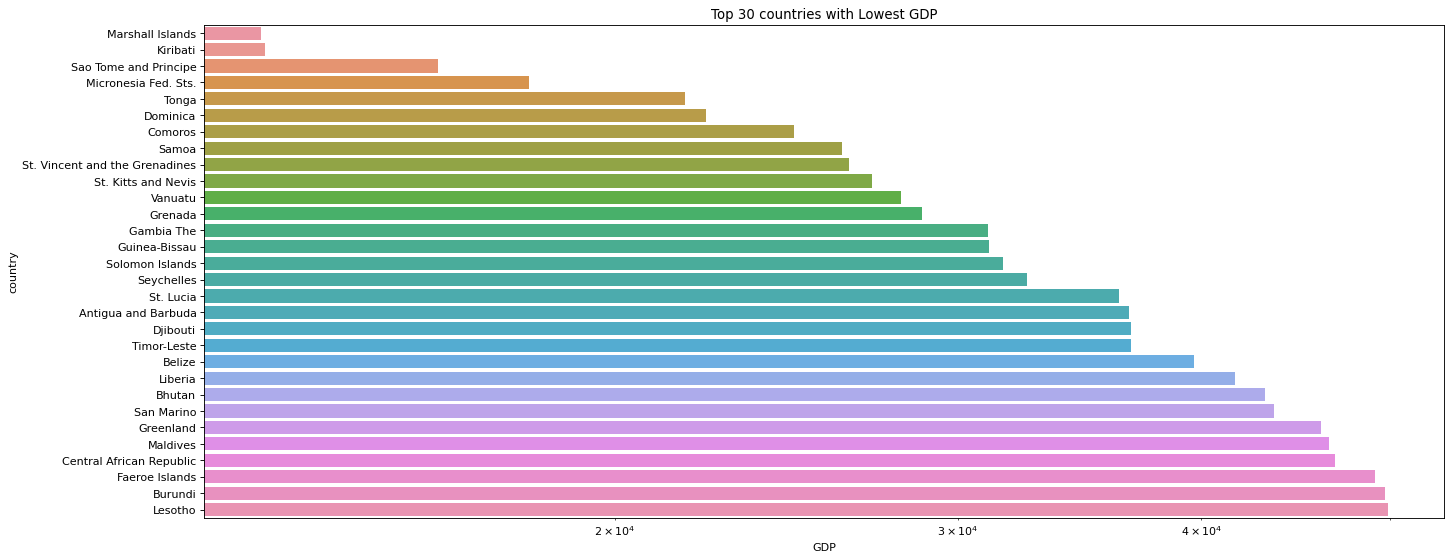

In [47]:
#Top 30 countries with highest and lowest GDP

df_gdp_country = world_development_final_data.groupby('country', group_keys=False).apply(lambda x: x.loc[x.GDP.idxmax()])

# df_gdp_country
top40 = df_gdp_country['GDP'].sort_values(ascending=False)[:30]
bot40 = df_gdp_country['GDP'].sort_values()[:30]

plt.figure(figsize=(20,8), dpi=80)
top = sns.barplot(x=top40, y=top40.index, log=True)
plt.title('Top 30 countries with Highest GDP')
plt.show()

plt.figure(figsize=(20,8), dpi=80)
bot = sns.barplot(x=bot40, y=bot40.index, log=True)
plt.title('Top 30 countries with Lowest GDP')
plt.show()

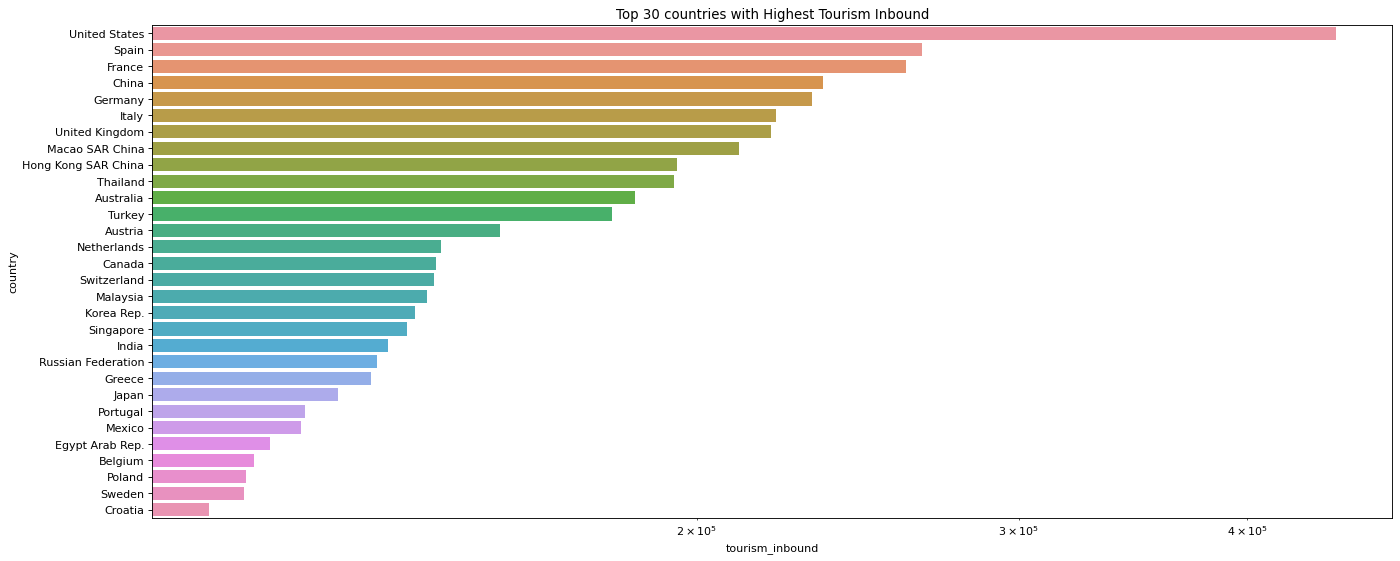

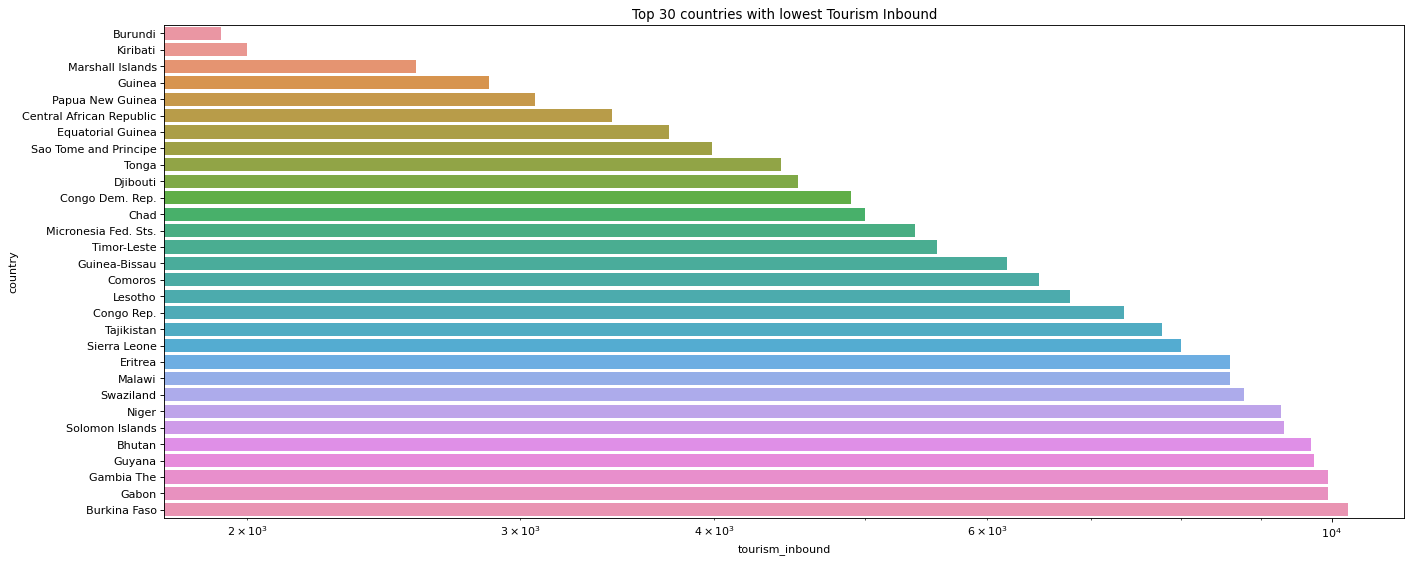

In [48]:
#Top 30 countries highest and lowest Tourism Inbound

df_ti_country = world_development_final_data.groupby('country', group_keys=False).apply(lambda x: x.loc[x['tourism_inbound'].idxmax()])

# df_gdp_country
top30 = df_ti_country['tourism_inbound'].sort_values(ascending=False)[:30]
bot30 = df_ti_country['tourism_inbound'].sort_values()[:30]

plt.figure(figsize=(20,8), dpi=80)
sns.barplot(x=top30, y=top30.index, log=True)
plt.title('Top 30 countries with Highest Tourism Inbound')
plt.show()

plt.figure(figsize=(20,8), dpi=80)
sns.barplot(x=bot30, y=bot30.index, log=True)
plt.title('Top 30 countries with lowest Tourism Inbound')
plt.show()
    

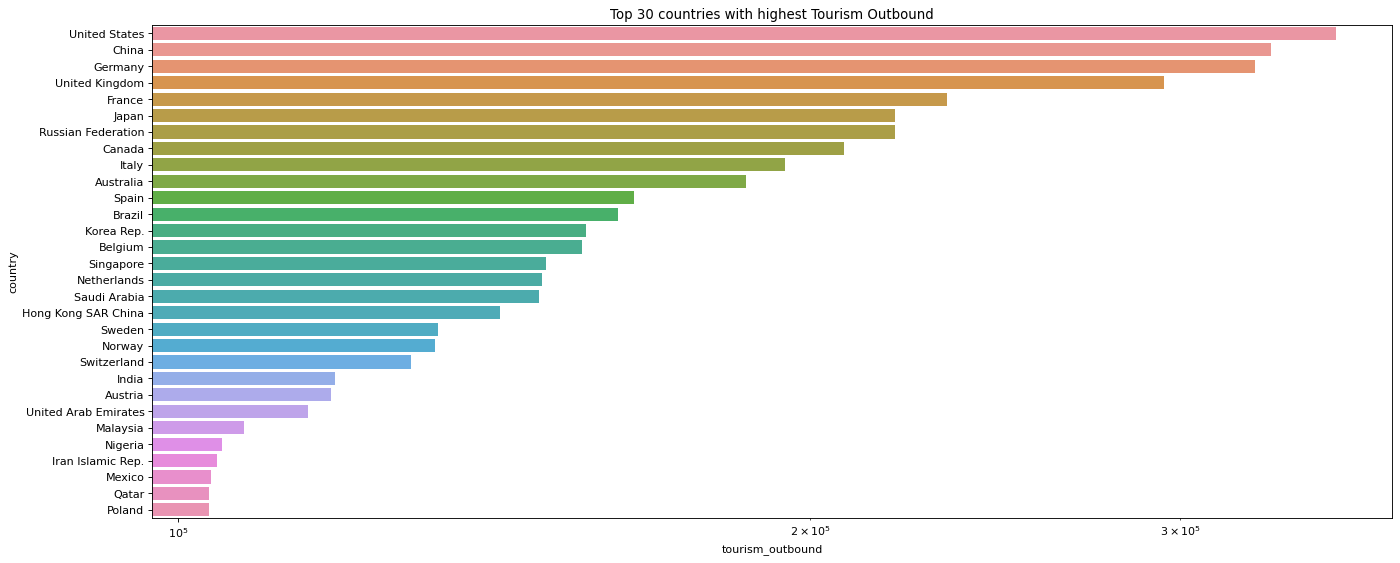

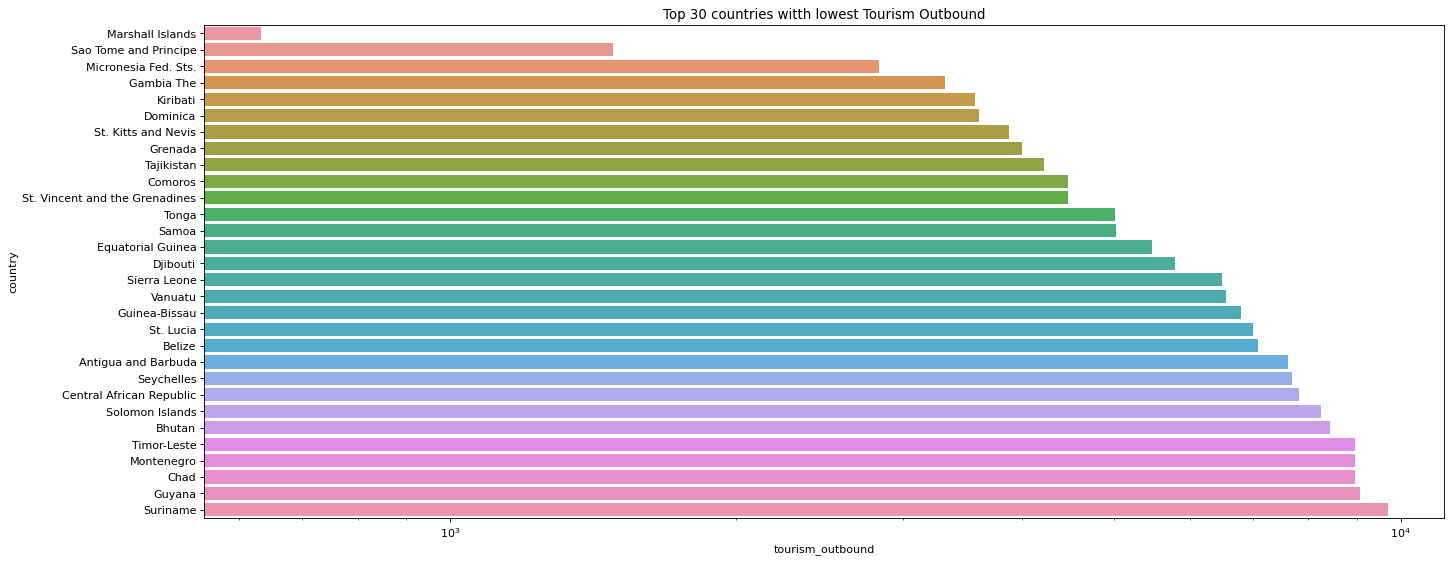

In [49]:
#Top 30 countries highest and lowest Tourism Outbound¶

df_to_country = world_development_final_data.groupby('country', group_keys=False).apply(lambda x: x.loc[x['tourism_outbound'].idxmax()])

# df_gdp_country
top30 = df_to_country['tourism_outbound'].sort_values(ascending=False)[:30]
bot30 = df_to_country['tourism_outbound'].sort_values()[:30]

plt.figure(figsize=(20,8), dpi=80)
top_bp = sns.barplot(x=top30, y=top30.index, log=True)
plt.title("Top 30 countries with highest Tourism Outbound")
plt.show()

plt.figure(figsize=(20,8), dpi=80)
bot_bp = sns.barplot(x=bot30, y=bot30.index, log=True)
plt.title("Top 30 countries witth lowest Tourism Outbound")
plt.show()


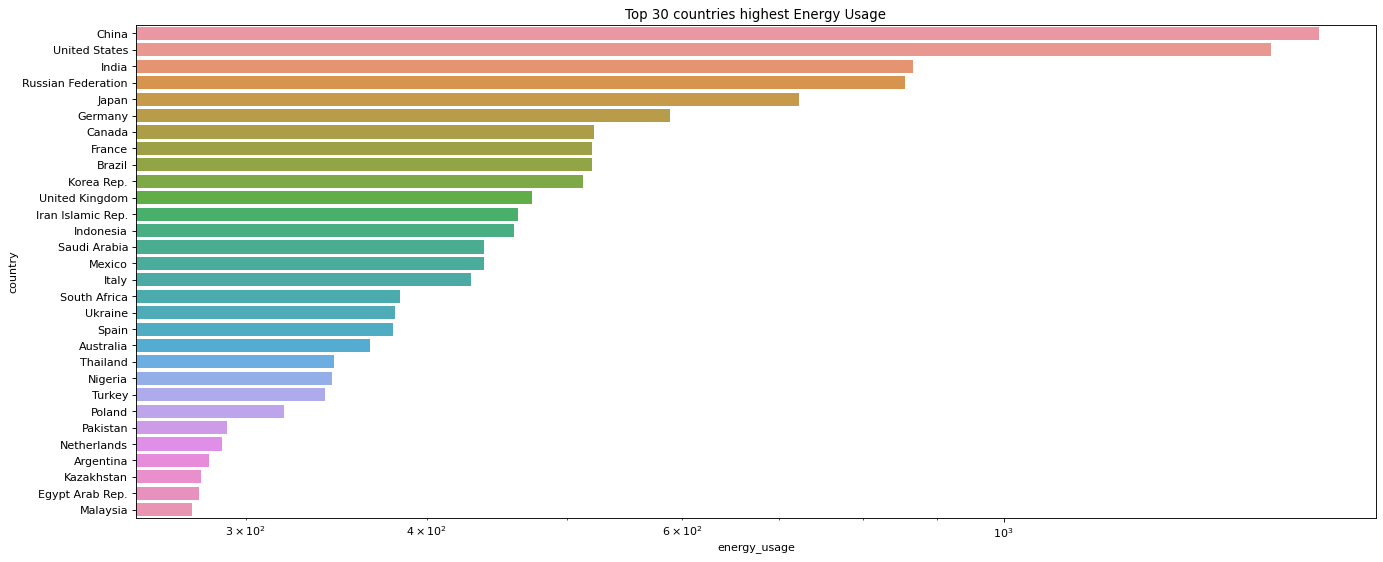

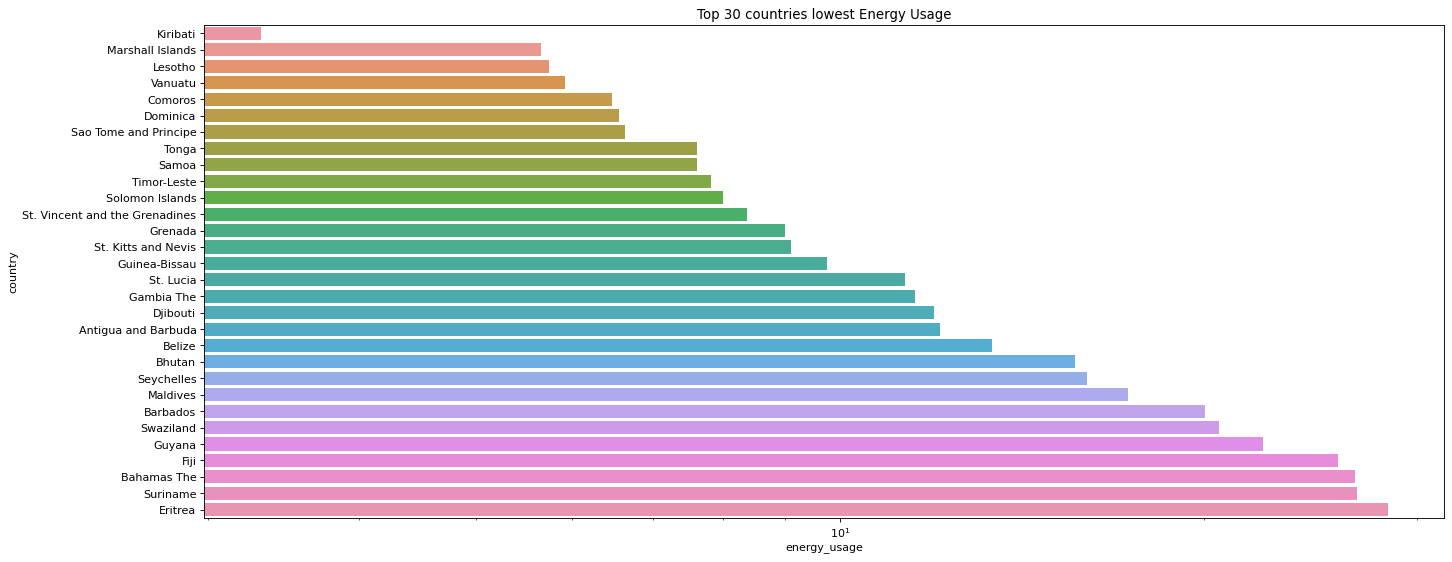

In [50]:
#Top 30 countries highest and lowest Energy Usage

df_eu_country = world_development_final_data.groupby('country', group_keys=False).apply(lambda x: x.loc[x['energy_usage'].idxmax()])

# df_gdp_country
top30 = df_eu_country['energy_usage'].sort_values(ascending=False)[:30]
bot30 = df_eu_country['energy_usage'].sort_values()[:30]

plt.figure(figsize=(20,8), dpi=80)
top_bp = sns.barplot(x=top30, y=top30.index, log=True)
plt.title("Top 30 countries highest Energy Usage")
plt.show()

plt.figure(figsize=(20,8), dpi=80)
bot_bp = sns.barplot(x=bot30, y=bot30.index, log=True)
plt.title("Top 30 countries lowest Energy Usage")
plt.show()

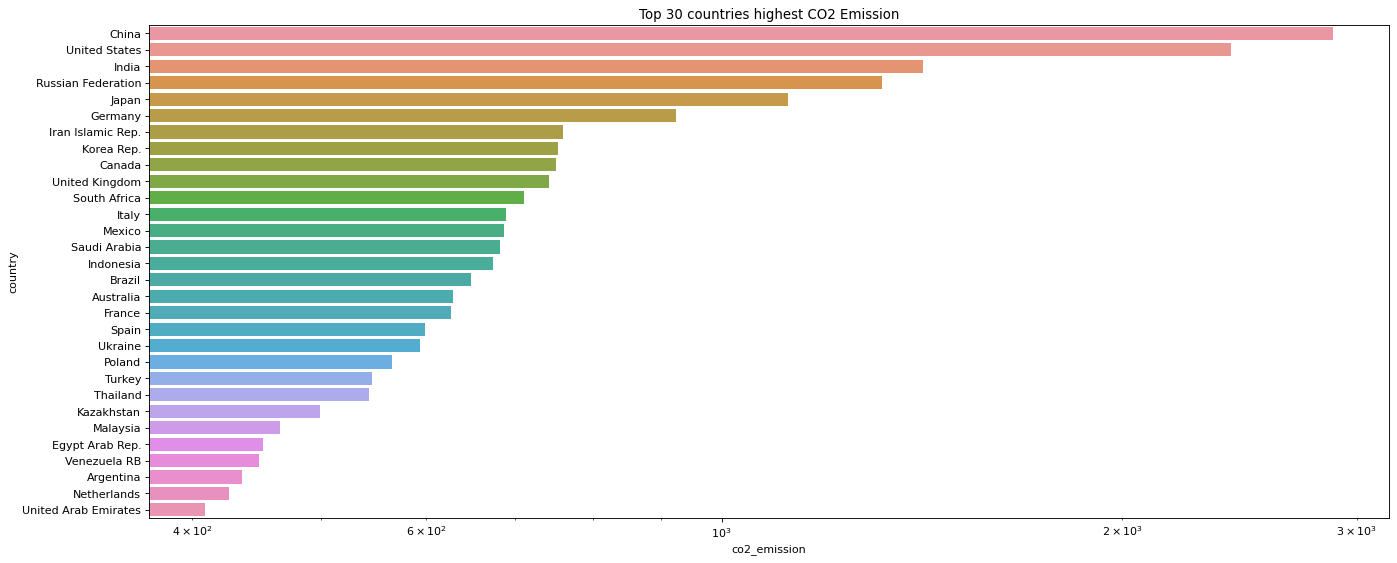

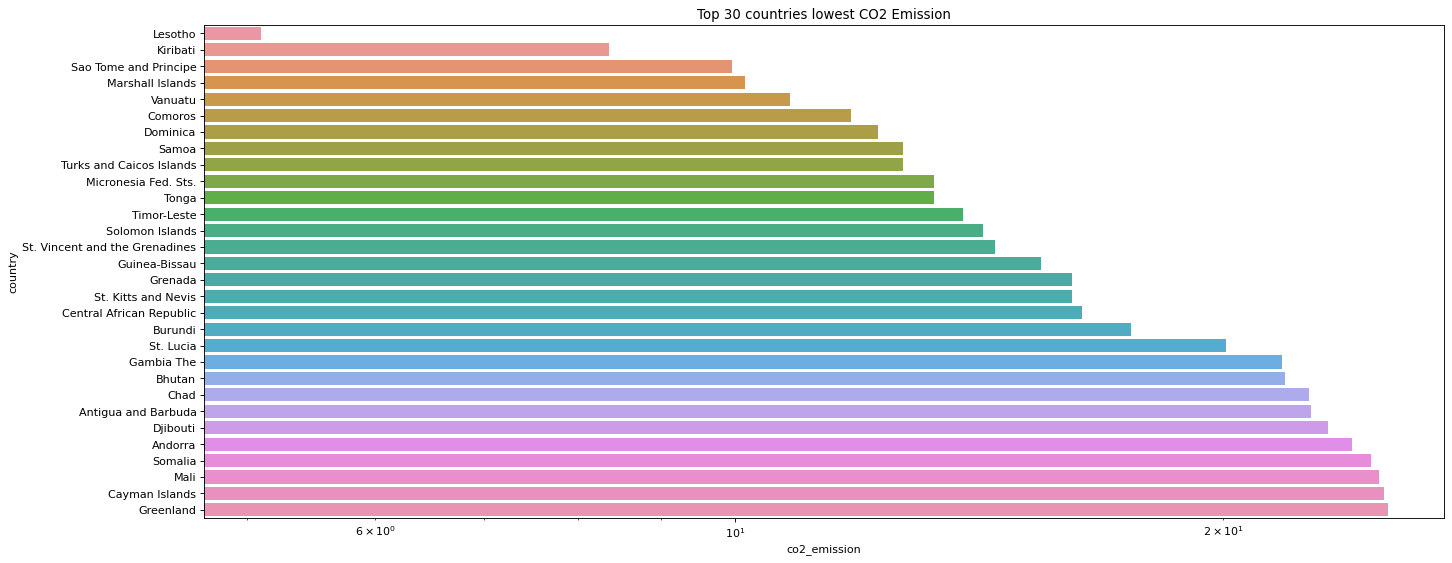

In [51]:
#Top 30 countries highest and lowest CO2 Emissions

df_ce_country = world_development_final_data.groupby('country', group_keys=False).apply(lambda x: x.loc[x['co2_emission'].idxmax()])

# df_gdp_country
top30 = df_ce_country['co2_emission'].sort_values(ascending=False)[:30]
bot30 = df_ce_country['co2_emission'].sort_values()[:30]

plt.figure(figsize=(20,8), dpi=80)
top_bp = sns.barplot(x=top30, y=top30.index, log=True)
plt.title("Top 30 countries highest CO2 Emission")
plt.show()

plt.figure(figsize=(20,8), dpi=80)
bot_bp = sns.barplot(x=bot30, y=bot30.index, log=True)
plt.title("Top 30 countries lowest CO2 Emission")
plt.show()

## Hopkins test
*The Hopkins statistic, commonly known as the Hopkins test, is a measure used to assess the clustering tendency of a dataset. It helps determine whether a dataset is suitable for clustering analysis. The test is based on the comparison of the distribution of distances between data points and the distribution of distances between data points and randomly generated points.

In [52]:
#Calculating the Hopkins statistic 
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

#Function to calculate Hopkins test score
def hopkins(X):
    d = X.shape[1]
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
        
    return H

In [53]:
features_1.columns

Index(['birth_rate', 'business_tax_rate', 'co2_emission',
       'days_to_start_business', 'energy_usage', 'GDP',
       'health_exp_percent_GDP', 'health_exp_percapita', 'hours_to_do_tax',
       'infant_mortality_rate', 'internet_usage', 'lending_interest',
       'life_expectancy_female', 'life_expectancy_male', 'mobile_phone_usage',
       'population_0_14', 'population_15_64', 'population_65_plus',
       'population_total', 'population_urban', 'tourism_inbound',
       'tourism_outbound'],
      dtype='object')

In [54]:
hopkins(features_1)

0.970494272929017

Hopkins test results will vary as it picks a set of samples each time. On running it multiple times, it can be seen that this data set gives Hopkins statistic value in the range of 0.88 to 0.97 and hence our dataset is good for clustering and lets proceed our analysis

# Standardization

In [55]:
# Scaling on numerical features
scaler = MinMaxScaler() # instantiate scaler
scaled_info = scaler.fit_transform(features_1)# fit and transform numerical data of given dataset
scaled_df = pd.DataFrame(scaled_info, columns = features_1.columns) # convert to dataframe
scaled_df.head()

,birth_rate,business_tax_rate,co2_emission,days_to_start_business,energy_usage,GDP,health_exp_percent_GDP,health_exp_percapita,hours_to_do_tax,infant_mortality_rate,internet_usage,lending_interest,life_expectancy_female,life_expectancy_male,mobile_phone_usage,population_0_14,population_15_64,population_65_plus,population_total,population_urban,tourism_inbound,tourism_outbound
0,0.282609,0.579151,0.102184,0.303797,0.097942,0.056216,0.124424,0.005855,0.746599,0.230216,0.0,0.434118,0.666667,0.588235,0.000000,0.586387,0.377604,0.149378,0.150067,0.563181,0.020746,0.037839
1,0.934783,0.847490,0.033044,0.832911,0.050807,0.021779,0.119816,0.002019,0.448554,0.906475,0.0,0.772355,0.166667,0.137255,0.000000,0.937173,0.065104,0.091286,0.098164,0.263617,0.011186,0.032747
2,0.782609,0.579151,0.013062,0.372152,0.025293,0.010100,0.161290,0.001312,0.438776,0.633094,0.0,0.458103,0.375000,0.313725,0.000000,0.879581,0.111979,0.107884,0.068246,0.327887,0.017780,0.018642
3,0.434783,0.203185,0.021817,0.789873,0.024273,0.016939,0.179724,0.015142,0.225340,0.374101,0.0,0.497627,0.270833,0.235294,0.034483,0.693717,0.294271,0.107884,0.032433,0.490196,0.031871,0.039428
4,0.847826,0.719836,0.010298,0.293671,0.056800,0.010728,0.198157,0.001009,0.438776,0.676259,0.0,0.458103,0.270833,0.235294,0.000000,0.916230,0.080729,0.103734,0.089300,0.104575,0.008868,0.014156


# Agglomeritive or Hierarchical Clustering

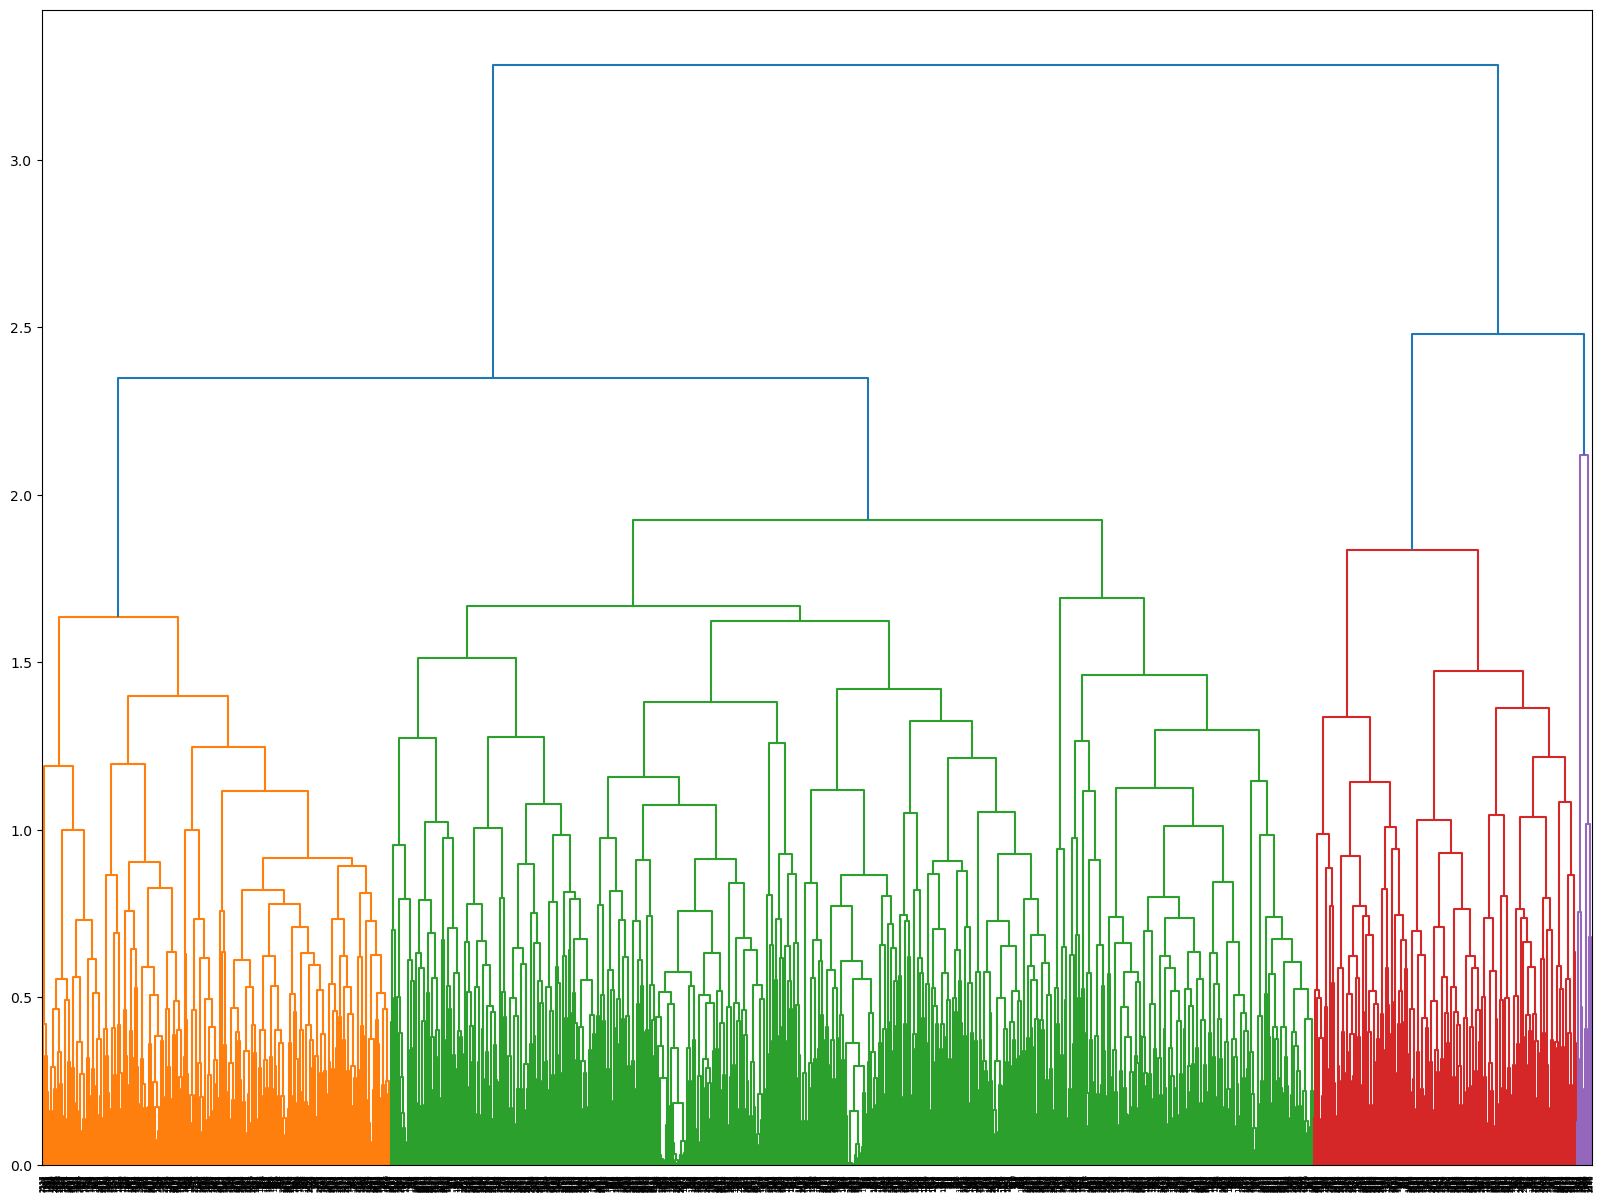

In [56]:
# create dendrogram
world_development1=world_development_final_data.copy()
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20, 15))  
dendograms=sch.dendrogram(sch.linkage(scaled_info,"complete"))

In [57]:
model=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="complete")
cluster_numbers=model.fit_predict(scaled_info)

In [58]:
world_development1['Hierarchical_Cluster_tag']=cluster_numbers

In [59]:
world_development1.Hierarchical_Cluster_tag.unique()

array([0, 1, 2], dtype=int64)

In [60]:
world_development1['Hierarchical_Cluster_tag'].value_counts()

0    2219
2     459
1      26
Name: Hierarchical_Cluster_tag, dtype: int64

In [61]:
# silhouette score
sil_score= silhouette_score(scaled_info, model.labels_)
print('silhouette score: ',sil_score)

silhouette score:  0.25603509337391617


# K-Means Clustering

In [62]:
world_development1 = world_development1.drop(columns=['Hierarchical_Cluster_tag'], axis=1)

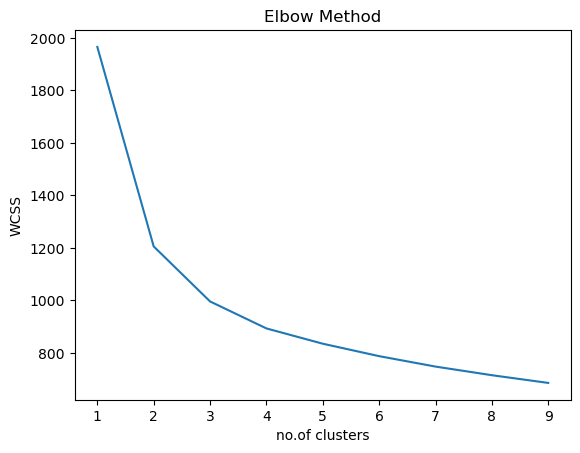

In [63]:
from sklearn.cluster import KMeans
WCSS = []
for i in range(1,10):
    k = KMeans(n_clusters=i).fit(scaled_info)
    WCSS.append(k.inertia_)
plt.plot(range(1,10),WCSS)
plt.title('Elbow Method')
plt.xlabel('no.of clusters')
plt.ylabel('WCSS')
plt.show()

In [64]:
pip install kneed

Optimal Number of Clusters is  3


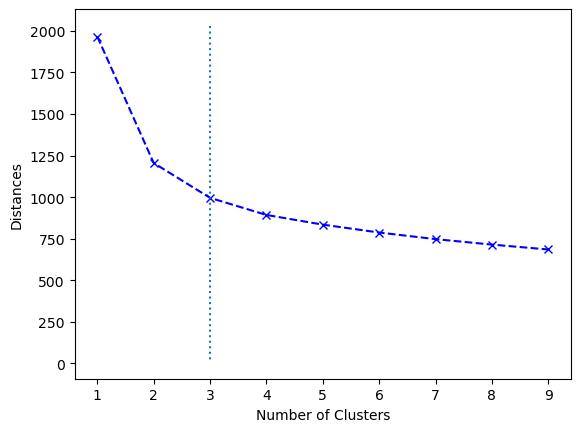

In [65]:
## Getting Optimal K value
from kneed import KneeLocator

y = WCSS
x = range(1, len(y)+1)

kn = KneeLocator(x, y, curve= 'convex', direction='decreasing')
print("Optimal Number of Clusters is ", kn.knee)

plt.plot(x, y, 'bx--')
plt.xlabel('Number of Clusters')
plt.ylabel('Distances')
plt.vlines(kn.knee, plt.ylim()[1], plt.xlim()[1], linestyles='dotted')
plt.show()

#### From the above elbow method diagram we can say that no.of clusters = 3.

In [66]:
model1=KMeans(n_clusters=3, random_state=5, init='k-means++', n_init=15,
               max_iter=500,)
cluster_numbers=model1.fit_predict(scaled_info)

In [67]:
world_development1['Kmeans_Cluster_tag']=cluster_numbers

In [68]:
world_development1['Kmeans_Cluster_tag'].value_counts()

2    1243
1     849
0     612
Name: Kmeans_Cluster_tag, dtype: int64

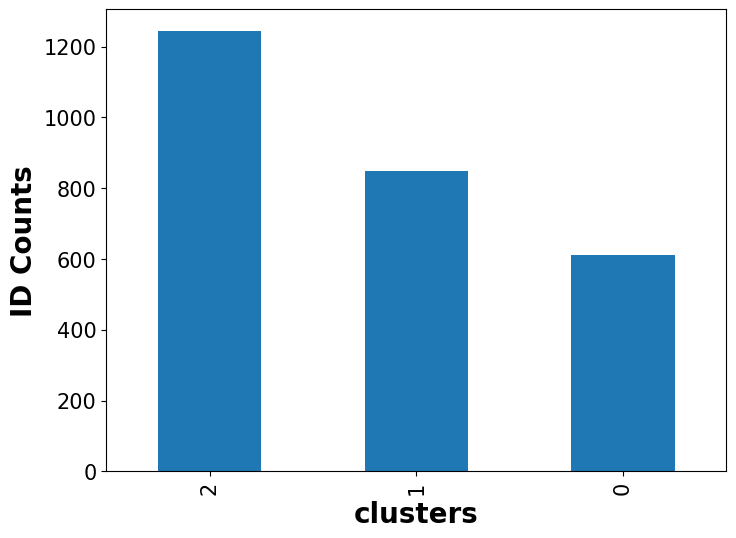

In [69]:
import matplotlib.pyplot as plt

world_development1['Kmeans_Cluster_tag'].value_counts().plot(kind='bar',figsize = (8,6))
plt.xlabel("clusters",loc="center",fontsize= 20,fontweight= "bold")
plt.ylabel("ID Counts",loc="center",fontsize=20,fontweight= "bold")
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [70]:
# silhouette score
sil_score_kmeans= silhouette_score(scaled_info, model1.labels_)
print('silhouette score: ',sil_score_kmeans)

silhouette score:  0.2507177077985873


In [71]:
world_development1.groupby('Kmeans_Cluster_tag').mean().round(1).reset_index()

,Kmeans_Cluster_tag,birth_rate,business_tax_rate,co2_emission,days_to_start_business,energy_usage,GDP,health_exp_percent_GDP,health_exp_percapita,hours_to_do_tax,infant_mortality_rate,internet_usage,lending_interest,life_expectancy_female,life_expectancy_male,mobile_phone_usage,population_0_14,population_15_64,population_65_plus,population_total,population_urban,tourism_inbound,tourism_outbound
0,0,0.0,38.1,398.1,18.0,265.7,658106.6,0.1,2495.2,197.3,0.0,0.6,-2.7,81.0,75.3,1.1,0.2,0.7,0.1,4240.5,0.8,99480.4,95268.0
1,1,0.0,37.6,74.3,34.6,86.6,98495.1,0.1,68.1,259.3,0.1,0.0,-1.8,58.4,55.8,0.2,0.4,0.5,0.0,3615.5,0.3,13090.7,13473.2
2,2,0.0,37.7,184.2,28.3,126.3,188420.5,0.1,315.3,248.9,0.0,0.2,-2.1,75.5,69.8,0.6,0.3,0.7,0.1,3136.8,0.6,34190.6,27051.6


# Principal Component Analysis

In [72]:
from sklearn.decomposition import PCA
pca = PCA()
pca_values = pca.fit_transform(scaled_df)
variance = pca.explained_variance_ratio_ # it gives importance of each and every PCA
variance

array([5.35002378e-01, 9.23768431e-02, 7.79957151e-02, 5.37886958e-02,
       5.14224164e-02, 4.38337501e-02, 3.48239007e-02, 2.97654607e-02,
       2.47449599e-02, 1.24355885e-02, 1.03213725e-02, 7.18624512e-03,
       6.26857067e-03, 5.26167915e-03, 4.76413219e-03, 4.19990098e-03,
       2.36642027e-03, 1.75937815e-03, 7.90791646e-04, 6.66320410e-04,
       2.18581065e-04, 6.89906806e-06])

In [73]:
var_cumulative = np.cumsum(np.round(variance, decimals= 3)*100)
var_cumulative

array([53.5, 62.7, 70.5, 75.9, 81. , 85.4, 88.9, 91.9, 94.4, 95.6, 96.6,
       97.3, 97.9, 98.4, 98.9, 99.3, 99.5, 99.7, 99.8, 99.9, 99.9, 99.9])

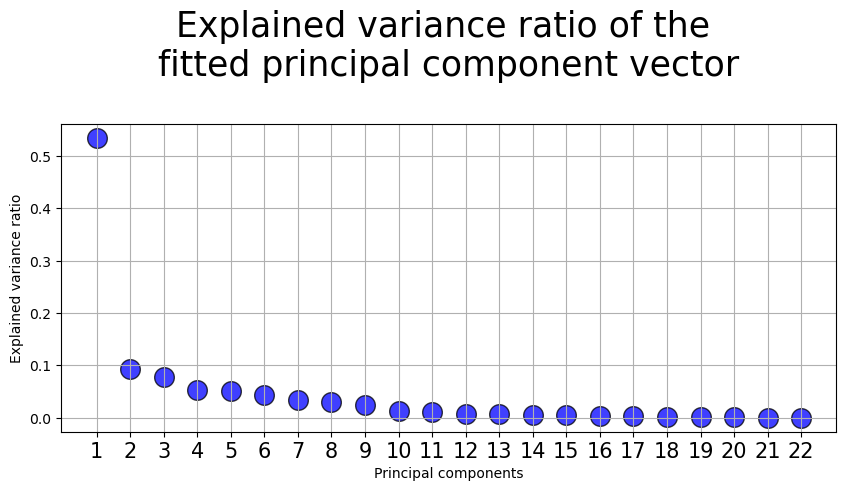

In [74]:
plt.figure(figsize=(10,4))
plt.scatter(x=[i+1 for i in range(len(pca.explained_variance_ratio_))],
            y=pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='blue',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=10)
plt.xticks([i+1 for i in range(len(pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=10)
plt.ylabel("Explained variance ratio",fontsize=10)
plt.show()

In [75]:
# PCA for 3 components
pca = PCA(n_components=3)
pca_values = pca.fit_transform(scaled_df)
variance = pca.explained_variance_ratio_
variance

array([0.53500238, 0.09237684, 0.07799572])

In [76]:
var_cumulative = np.cumsum(np.round(variance, decimals= 3)*100)
var_cumulative

array([53.5, 62.7, 70.5])

In [77]:
## Creating Dataframe for top 7 PCA values
# pca_df = pd.DataFrame(pca_values ,columns=["PCA1","PCA2","PCA3", "PCA4", "PCA5", "PCA6", "PCA7", "PCA8", "PCA9"])
pca_df = pd.DataFrame(pca_values ,columns=["PCA1","PCA2","PCA3"])
pca_df.head(10)

,PCA1,PCA2,PCA3
0,-0.212748,0.068760,-0.283407
1,-1.335831,0.324923,0.031389
2,-0.948457,0.059883,0.173803
3,-0.662071,-0.202518,-0.028413
4,-1.117956,0.186131,0.238023
5,-1.152108,0.181351,0.347778
6,-0.948695,0.172547,0.152892
7,-1.064019,0.396626,0.023752
8,-1.308984,0.164332,0.151705
9,-0.788800,-0.116782,0.237442


# Agglomeritive or Hierarchical Clustering using PCA values

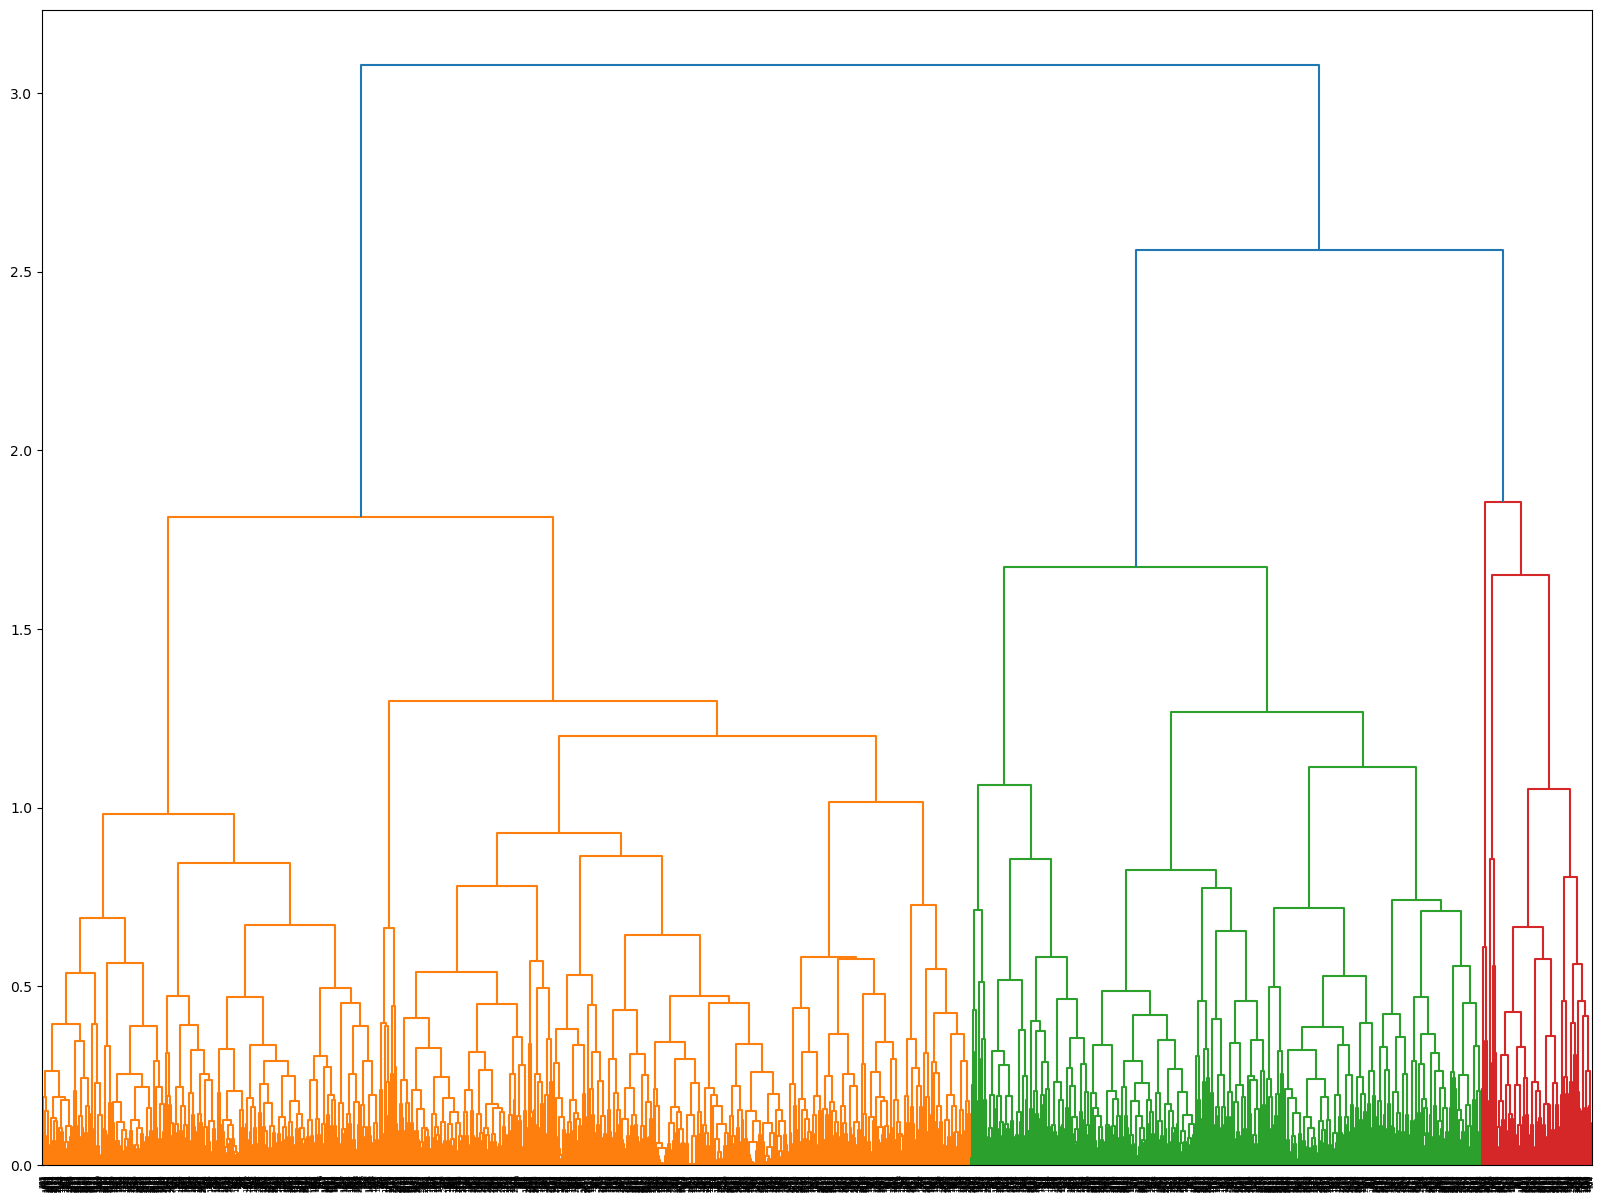

In [78]:
# create dendrogram
world_development2=world_development_final_data.copy()
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20, 15))  
dendograms=sch.dendrogram(sch.linkage(pca_values,"complete"))

In [79]:
model=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="complete")
cluster_numbers=model.fit_predict(pca_values)

In [80]:
world_development2['Hierarchical_Cluster_tag']=cluster_numbers

In [81]:
world_development2.Hierarchical_Cluster_tag.unique()

array([1, 2, 0], dtype=int64)

In [82]:
world_development2['Hierarchical_Cluster_tag'].value_counts()

1    1621
2     891
0     192
Name: Hierarchical_Cluster_tag, dtype: int64

In [83]:
# silhouette score
sil_score= silhouette_score(pca_values, model.labels_)
print('silhouette score: ',sil_score)

silhouette score:  0.31651004107729314


# K-means clustering using PCA values

In [84]:
world_development2 = world_development2.drop(columns=['Hierarchical_Cluster_tag'], axis=1)

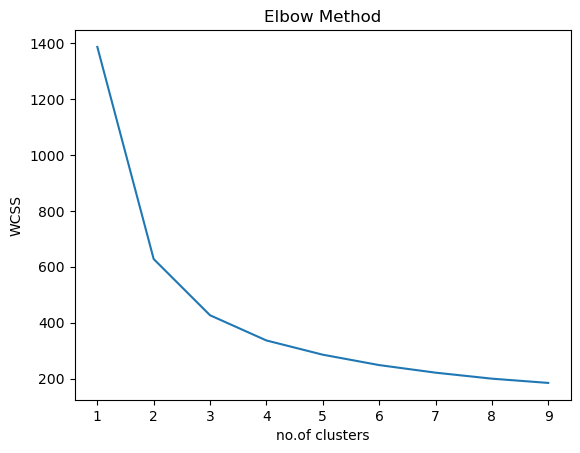

In [85]:
from sklearn.cluster import KMeans
WCSS = []
for i in range(1,10):
    k = KMeans(n_clusters=i, init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=5).fit(pca_values)
    WCSS.append(k.inertia_)
plt.plot(range(1,10),WCSS)
plt.title('Elbow Method')
plt.xlabel('no.of clusters')
plt.ylabel('WCSS')
plt.show() 

In [86]:
# We will also use the Silhouette score to determine an optimal number.

k = [2,3,4,5,6,7,8,9]

#  Silhouette score for MinMaxScaler Applied on data .

for n_clusters in k:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(pca_values)
    sil_score1= silhouette_score(pca_values, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)


For n_clusters = 2 The average silhouette_score is : 0.4684153336663129
For n_clusters = 3 The average silhouette_score is : 0.41021318187711736
For n_clusters = 4 The average silhouette_score is : 0.3568606924787865
For n_clusters = 5 The average silhouette_score is : 0.3234890875873803
For n_clusters = 6 The average silhouette_score is : 0.3327061000158417
For n_clusters = 7 The average silhouette_score is : 0.31418299847723424
For n_clusters = 8 The average silhouette_score is : 0.3153165663376639
For n_clusters = 9 The average silhouette_score is : 0.2988377315680248


No. of Optimal Clusters is  3


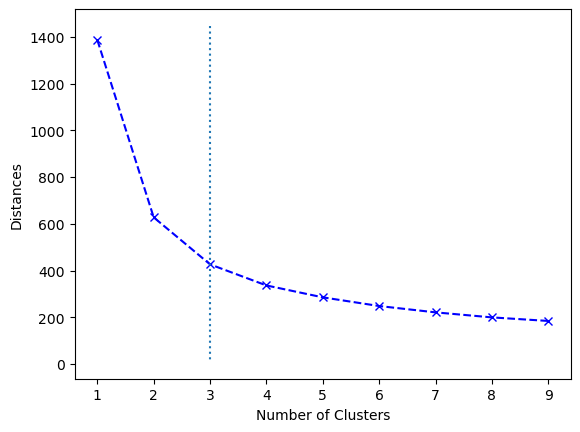

In [87]:
## Getting Optimal K value
from kneed import KneeLocator

y = WCSS
x = range(1, len(y)+1)

kn = KneeLocator(x, y, curve= 'convex', direction='decreasing')
print("No. of Optimal Clusters is ", kn.knee)

plt.plot(x, y, 'bx--')
plt.xlabel('Number of Clusters')
plt.ylabel('Distances')
plt.vlines(kn.knee, plt.ylim()[1], plt.xlim()[1], linestyles='dotted')
plt.show()

In [88]:
kmeans_model=KMeans(n_clusters=3, init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=5)
cluster_numbers = kmeans_model.fit_predict(pca_values)

In [89]:
data_after_imputation['Cluster']=cluster_numbers

In [90]:
data_after_imputation['Cluster'].value_counts()

0    1278
1     882
2     544
Name: Cluster, dtype: int64

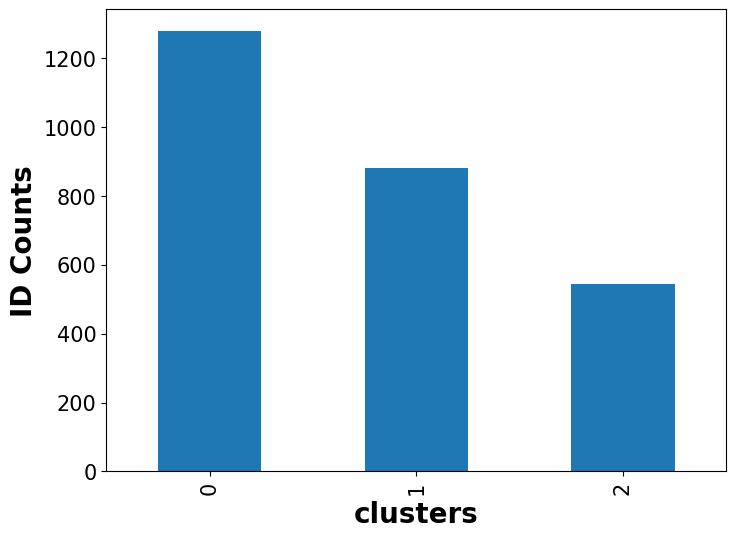

In [91]:
import matplotlib.pyplot as plt

data_after_imputation['Cluster'].value_counts().plot(kind='bar',figsize = (8,6))
plt.xlabel("clusters",loc="center",fontsize= 20,fontweight= "bold")
plt.ylabel("ID Counts",loc="center",fontsize=20,fontweight= "bold")
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [92]:
# silhouette score
sil_score_kmeans= silhouette_score(pca_values, kmeans_model.labels_)
print('silhouette score: ',sil_score_kmeans)

silhouette score:  0.41021318187711736


In [93]:
data_after_imputation.groupby('Cluster').mean().round(1).reset_index()

,Cluster,birth_rate,business_tax_rate,co2_emission,days_to_start_business,energy_usage,GDP,health_exp_percent_GDP,health_exp_percapita,hours_to_do_tax,infant_mortality_rate,internet_usage,lending_interest,life_expectancy_female,life_expectancy_male,mobile_phone_usage,population_0_14,population_15_64,population_65_plus,population_total,population_urban,tourism_inbound,tourism_outbound
0,0,0.0,37.7,80016.4,28.3,32096.6,7.366634e+10,0.1,371.2,248.9,0.0,0.2,0.1,75.8,70.0,0.6,0.3,0.7,0.1,25112084.4,0.6,1.921375e+09,1.247006e+09
1,1,0.0,37.6,26855.3,34.5,16229.9,2.425883e+10,0.1,70.4,258.2,0.1,0.0,0.2,58.9,56.2,0.2,0.4,0.5,0.0,29642880.6,0.3,3.658833e+08,3.783924e+08
2,2,0.0,38.1,428660.8,16.3,171377.3,1.002712e+12,0.1,2647.5,191.9,0.0,0.6,0.1,81.3,75.6,1.1,0.2,0.7,0.1,49305621.7,0.8,1.648578e+10,1.626841e+10


In [94]:
cluster_df =data_after_imputation.copy()
cluster_df

,birth_rate,business_tax_rate,co2_emission,country,days_to_start_business,energy_usage,GDP,health_exp_percent_GDP,health_exp_percapita,hours_to_do_tax,infant_mortality_rate,internet_usage,lending_interest,life_expectancy_female,life_expectancy_male,mobile_phone_usage,population_0_14,population_15_64,population_65_plus,population_total,population_urban,tourism_inbound,tourism_outbound,Cluster
0,0.020,38.2000,8.793100e+04,Algeria,25.0,2.699800e+04,5.479006e+10,0.035,60.0,451.00,0.034,0.0,0.100,71.0,67.0,0.000000,0.342,0.619,0.039,31719449,0.599,1.020000e+08,1.930000e+08,0
1,0.050,52.1000,9.542000e+03,Angola,66.8,7.499000e+03,9.129595e+09,0.034,22.0,275.75,0.128,0.0,1.032,47.0,44.0,0.000000,0.476,0.499,0.025,13924930,0.324,3.400000e+07,1.460000e+08,1
2,0.043,38.2000,1.617000e+03,Benin,30.4,1.983000e+03,2.359122e+09,0.043,15.0,270.00,0.090,0.0,0.118,57.0,53.0,0.000000,0.454,0.517,0.029,6949366,0.383,7.700000e+07,5.000000e+07,1
3,0.027,18.7250,4.276000e+03,Botswana,63.4,1.836000e+03,5.788312e+09,0.047,152.0,144.50,0.054,0.0,0.155,52.0,49.0,0.100000,0.383,0.587,0.029,1755375,0.532,2.270000e+08,2.090000e+08,1
4,0.046,45.4875,1.041000e+03,Burkina Faso,24.2,9.308000e+03,2.610959e+09,0.051,12.0,270.00,0.096,0.0,0.118,52.0,49.0,0.000000,0.468,0.505,0.028,11607944,0.178,2.300000e+07,3.000000e+07,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.020,38.2000,1.124545e+02,Turks and Caicos Islands,25.0,9.308000e+03,1.443393e+10,0.061,191.0,226.00,0.020,0.1,0.118,75.0,69.0,0.500000,0.298,0.643,0.053,32427,0.911,2.960000e+08,3.940000e+08,0
2700,0.013,46.4000,5.657526e+06,United States,5.0,2.132446e+06,1.624460e+13,0.179,8895.0,175.00,0.006,0.8,0.033,81.0,76.0,1.000000,0.196,0.667,0.136,313873685,0.811,2.000920e+11,1.265730e+11,2
2701,0.015,41.9000,6.046818e+03,Uruguay,7.0,3.328083e+03,5.000435e+10,0.089,1308.0,310.00,0.010,0.5,0.112,80.0,74.0,1.500000,0.220,0.639,0.140,3395253,0.948,2.222000e+09,1.028000e+09,2
2702,0.020,52.2200,1.801557e+05,Venezuela RB,25.0,6.326858e+04,3.812862e+11,0.046,593.0,226.00,0.013,0.5,0.164,78.0,72.0,1.000000,0.288,0.652,0.060,29954782,0.889,9.040000e+08,3.202000e+09,0


In [95]:
cluster_1_df = cluster_df[cluster_df["Cluster"]==0]
cluster_1_df

,birth_rate,business_tax_rate,co2_emission,country,days_to_start_business,energy_usage,GDP,health_exp_percent_GDP,health_exp_percapita,hours_to_do_tax,infant_mortality_rate,internet_usage,lending_interest,life_expectancy_female,life_expectancy_male,mobile_phone_usage,population_0_14,population_15_64,population_65_plus,population_total,population_urban,tourism_inbound,tourism_outbound,Cluster
0,0.020,38.2000,87931.000000,Algeria,25.000000,26998.000000,5.479006e+10,0.035,60.0,451.0,0.034,0.0,0.100,71.000000,67.000000,0.000000,0.342,0.619,0.039,31719449,0.599,1.020000e+08,1.930000e+08,0
26,0.022,31.6000,47114.000000,Libya,35.000000,15901.000000,3.389660e+10,0.034,252.0,226.0,0.024,0.0,0.070,74.000000,70.000000,0.000000,0.333,0.628,0.039,5176185,0.763,8.400000e+07,4.950000e+08,0
31,0.017,26.3250,2769.000000,Mauritius,19.444444,1115.750000,4.582562e+09,0.037,146.0,161.0,0.016,0.1,0.208,75.000000,68.000000,0.200000,0.258,0.681,0.061,1186873,0.427,7.320000e+08,2.030000e+08,0
32,0.022,49.8500,33905.000000,Morocco,14.400000,10238.000000,3.702061e+10,0.042,54.0,328.0,0.043,0.0,0.133,70.000000,67.000000,0.100000,0.341,0.613,0.047,28710123,0.533,2.280000e+09,5.060000e+08,0
40,0.019,42.2375,565.000000,Seychelles,39.000000,233.000000,6.148780e+08,0.048,371.0,76.0,0.012,0.1,0.107,77.363636,68.181818,0.300000,0.282,0.637,0.081,81131,0.501,2.250000e+08,4.400000e+07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2697,0.018,27.9000,2339.636364,Suriname,25.000000,697.000000,5.012121e+09,0.059,521.0,199.0,0.021,0.3,0.117,74.000000,68.000000,1.100000,0.278,0.656,0.066,534541,0.662,7.900000e+07,5.800000e+07,0
2698,0.015,29.1000,34882.909091,Trinidad and Tobago,41.000000,16811.333333,2.343634e+10,0.054,972.0,210.0,0.020,0.6,0.077,74.000000,66.000000,1.400000,0.207,0.705,0.088,1337439,0.088,5.212500e+08,1.596667e+08,0
2699,0.020,38.2000,112.454545,Turks and Caicos Islands,25.000000,9308.000000,1.443393e+10,0.061,191.0,226.0,0.020,0.1,0.118,75.000000,69.000000,0.500000,0.298,0.643,0.053,32427,0.911,2.960000e+08,3.940000e+08,0
2702,0.020,52.2200,180155.727273,Venezuela RB,25.000000,63268.583333,3.812862e+11,0.046,593.0,226.0,0.013,0.5,0.164,78.000000,72.000000,1.000000,0.288,0.652,0.060,29954782,0.889,9.040000e+08,3.202000e+09,0


In [96]:
cluster_2_df = cluster_df[cluster_df["Cluster"]==1]
cluster_2_df

,birth_rate,business_tax_rate,co2_emission,country,days_to_start_business,energy_usage,GDP,health_exp_percent_GDP,health_exp_percapita,hours_to_do_tax,infant_mortality_rate,internet_usage,lending_interest,life_expectancy_female,life_expectancy_male,mobile_phone_usage,population_0_14,population_15_64,population_65_plus,population_total,population_urban,tourism_inbound,tourism_outbound,Cluster
1,0.050,52.1000,9542.000000,Angola,66.8,7499.000000,9.129595e+09,0.034,22.0,275.750,0.128,0.0,1.032,47.0,44.0,0.0,0.476,0.499,0.025,13924930,0.324,3.400000e+07,1.460000e+08,1
2,0.043,38.2000,1617.000000,Benin,30.4,1983.000000,2.359122e+09,0.043,15.0,270.000,0.090,0.0,0.118,57.0,53.0,0.0,0.454,0.517,0.029,6949366,0.383,7.700000e+07,5.000000e+07,1
3,0.027,18.7250,4276.000000,Botswana,63.4,1836.000000,5.788312e+09,0.047,152.0,144.500,0.054,0.0,0.155,52.0,49.0,0.1,0.383,0.587,0.029,1755375,0.532,2.270000e+08,2.090000e+08,1
4,0.046,45.4875,1041.000000,Burkina Faso,24.2,9308.000000,2.610959e+09,0.051,12.0,270.000,0.096,0.0,0.118,52.0,49.0,0.0,0.468,0.505,0.028,11607944,0.178,2.300000e+07,3.000000e+07,1
5,0.042,51.6000,301.000000,Burundi,12.5,9308.000000,8.704861e+08,0.063,7.0,182.375,0.092,0.0,0.158,49.0,47.0,0.0,0.490,0.481,0.029,6674286,0.082,1.400000e+06,1.400000e+07,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,0.036,11.0000,177.111111,Timor-Leste,25.0,59.000000,1.355000e+09,0.043,50.0,276.000,0.048,0.0,0.122,69.0,66.0,0.6,0.463,0.505,0.032,1148958,0.308,2.100000e+07,8.000000e+07,1
2643,0.031,32.7000,19319.090909,Yemen Rep.,40.0,6517.833333,3.199280e+10,0.055,71.0,248.000,0.042,0.2,0.245,64.0,62.0,0.6,0.407,0.565,0.028,23852409,0.329,1.057000e+09,2.036667e+08,1
2654,0.029,42.1000,3812.363636,Papua New Guinea,53.0,9308.000000,1.565392e+10,0.052,114.0,207.000,0.048,0.0,0.108,64.0,60.0,0.4,0.384,0.588,0.029,7167010,0.130,4.725000e+06,7.254545e+07,1
2656,0.031,25.3000,184.090909,Solomon Islands,9.0,59.750000,9.999724e+08,0.080,148.0,80.000,0.026,0.1,0.113,69.0,66.0,0.6,0.404,0.563,0.033,549598,0.210,6.690000e+07,6.800000e+07,1


In [97]:
cluster_3_df = cluster_df[cluster_df["Cluster"]==2]
cluster_3_df

,birth_rate,business_tax_rate,co2_emission,country,days_to_start_business,energy_usage,GDP,health_exp_percent_GDP,health_exp_percapita,hours_to_do_tax,infant_mortality_rate,internet_usage,lending_interest,life_expectancy_female,life_expectancy_male,mobile_phone_usage,population_0_14,population_15_64,population_65_plus,population_total,population_urban,tourism_inbound,tourism_outbound,Cluster
62,0.008,23.5500,4.046500e+04,Hong Kong SAR China,8.4,1.339200e+04,1.716682e+11,0.061,191.0,79.75,0.020,0.3,0.095,84.0,78.0,0.8,0.173,0.717,0.110,6665000,1.000,8.198000e+09,1.250200e+10,2
65,0.009,51.6500,1.219589e+06,Japan,24.6,5.189640e+05,4.731199e+12,0.076,2834.0,342.50,0.003,0.3,0.021,85.0,78.0,0.5,0.146,0.682,0.172,126870000,0.786,5.970000e+09,4.264300e+10,2
68,0.013,30.8375,4.475610e+05,Korea Rep.,14.2,1.881610e+05,5.616330e+11,0.043,491.0,256.50,0.005,0.4,0.085,80.0,72.0,0.6,0.210,0.717,0.073,47008111,0.796,8.527000e+09,7.945000e+09,2
79,0.012,26.3125,4.900600e+04,Singapore,4.9,1.869200e+04,9.583597e+10,0.027,662.0,82.25,0.003,0.4,0.058,80.0,76.0,0.7,0.215,0.712,0.073,4027900,1.000,5.142000e+09,4.535000e+09,2
89,0.010,53.3375,6.369600e+04,Austria,25.0,2.855800e+04,1.920707e+11,0.100,2403.0,170.00,0.005,0.3,0.118,81.0,75.0,0.8,0.170,0.675,0.155,8011566,0.658,1.138200e+10,7.001000e+09,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2670,0.014,27.7000,6.272391e+04,Chile,8.0,3.272000e+04,2.662593e+11,0.072,1103.0,291.00,0.007,0.6,0.101,82.0,77.0,1.4,0.214,0.689,0.097,17464814,0.890,3.180000e+09,2.348000e+09,2
2686,0.019,52.5000,4.252716e+05,Mexico,6.0,1.919240e+05,1.186461e+12,0.061,618.0,337.00,0.013,0.4,0.047,80.0,75.0,0.8,0.290,0.647,0.063,120847477,0.784,1.332000e+10,1.073500e+10,2
2691,0.011,50.7000,8.196000e+03,Puerto Rico,6.0,9.308000e+03,1.010807e+11,0.061,191.0,218.00,0.020,0.7,0.118,82.0,75.0,0.8,0.198,0.667,0.135,3651545,0.937,3.193000e+09,1.156000e+09,2
2700,0.013,46.4000,5.657526e+06,United States,5.0,2.132446e+06,1.624460e+13,0.179,8895.0,175.00,0.006,0.8,0.033,81.0,76.0,1.0,0.196,0.667,0.136,313873685,0.811,2.000920e+11,1.265730e+11,2


<AxesSubplot:xlabel='Cluster', ylabel='count'>

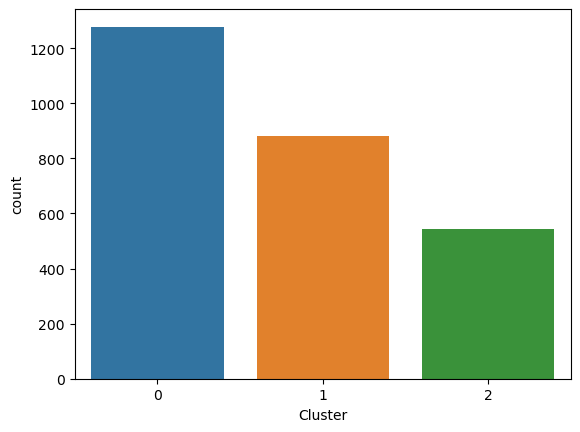

In [98]:
#Visualization
sns.countplot(x='Cluster', data=cluster_df)

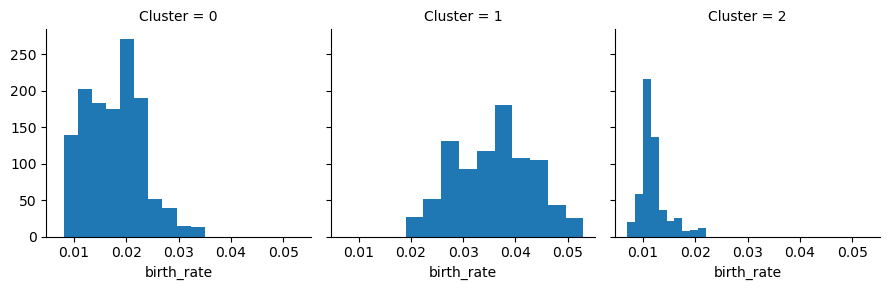

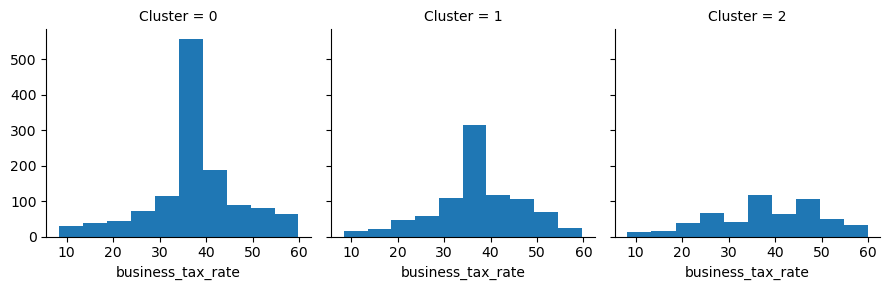

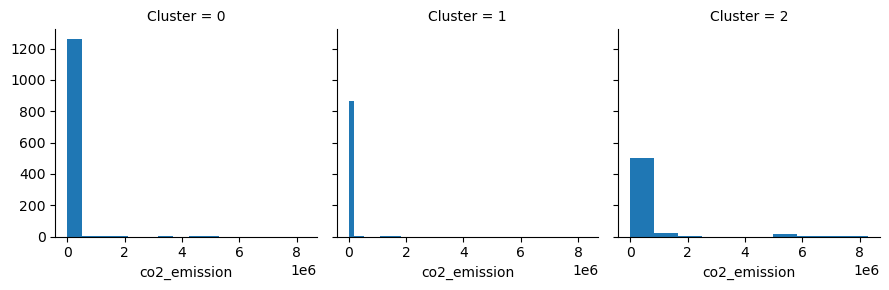

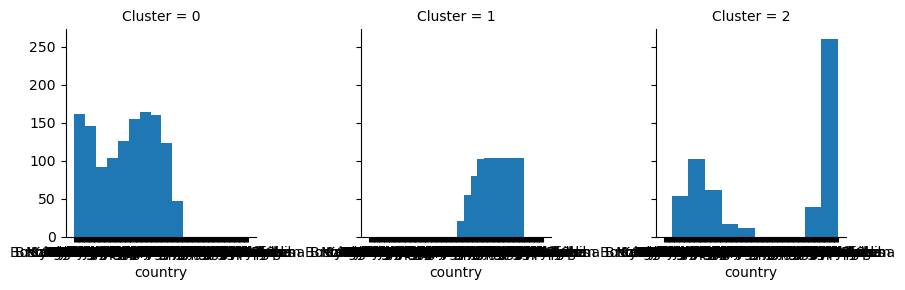

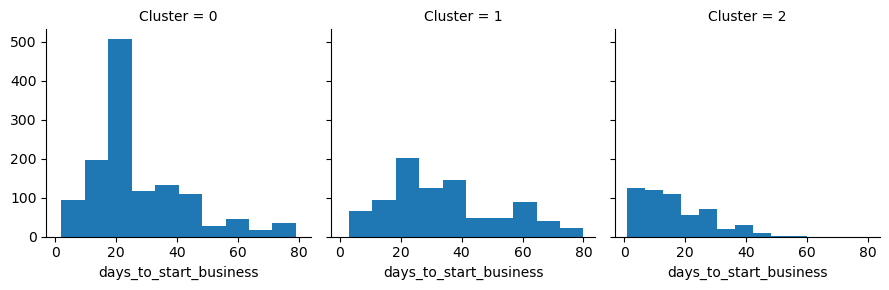

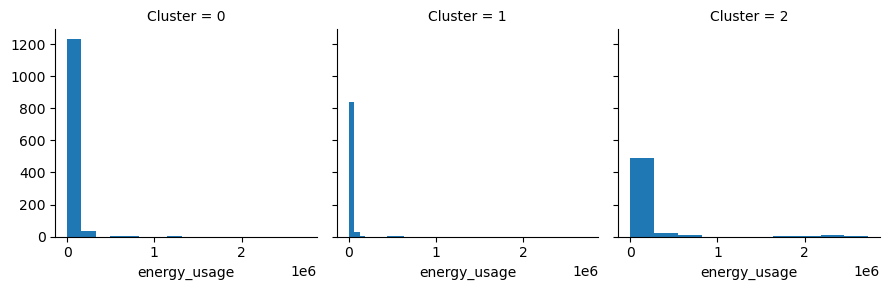

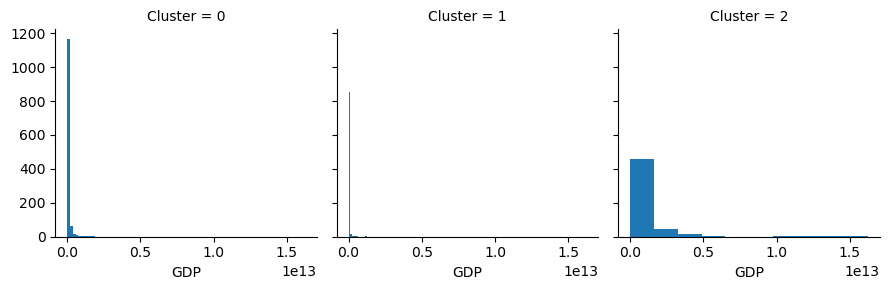

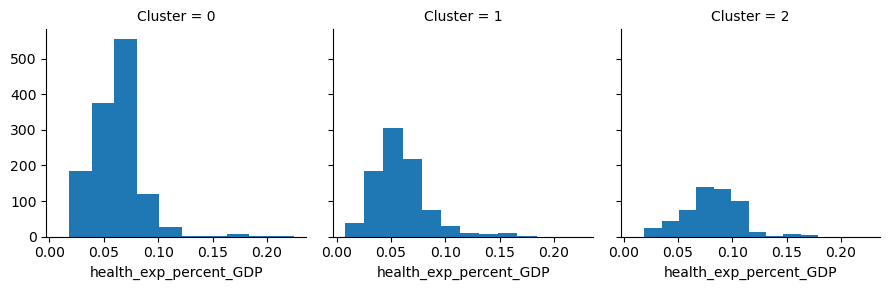

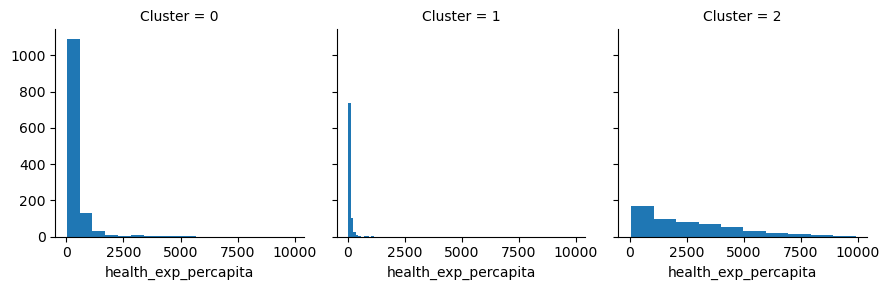

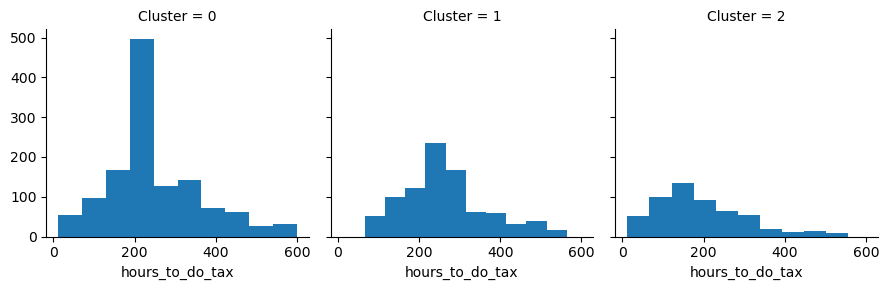

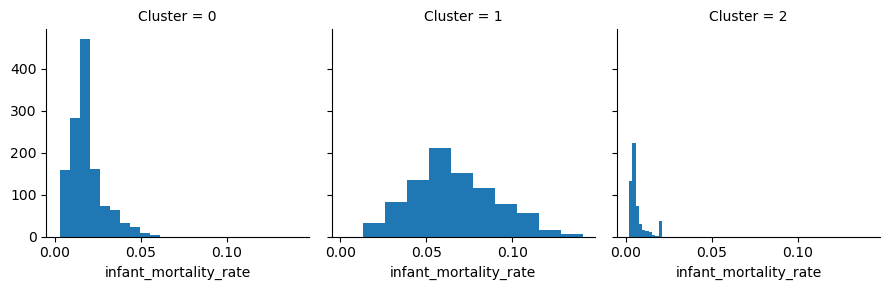

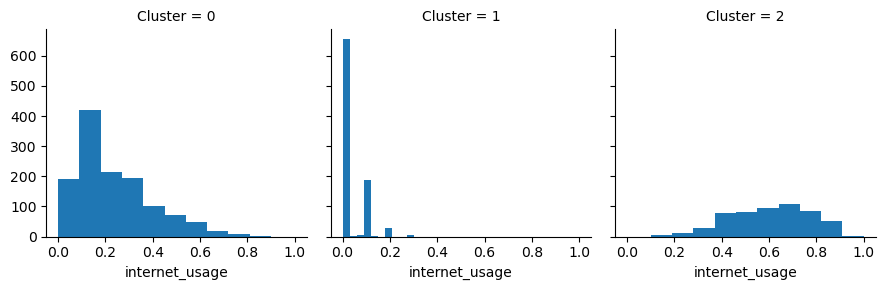

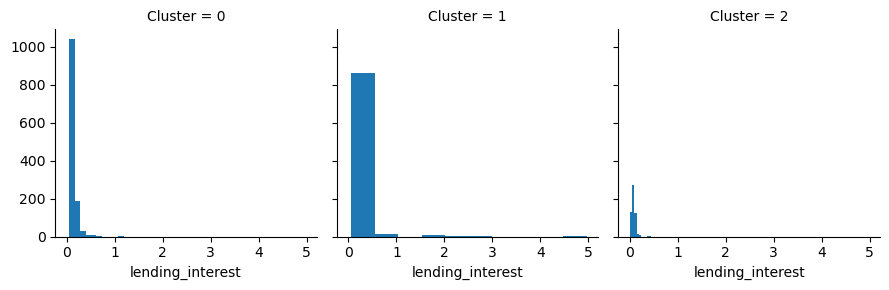

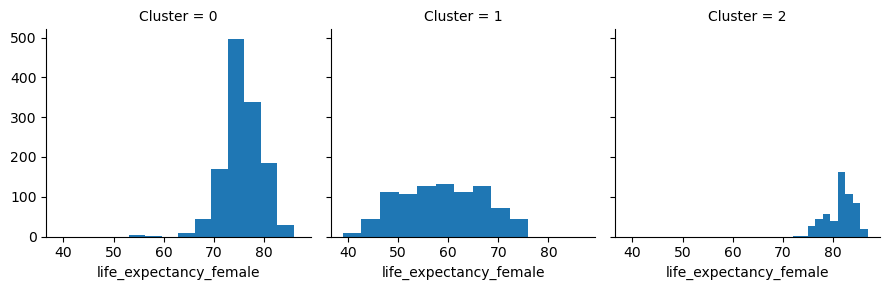

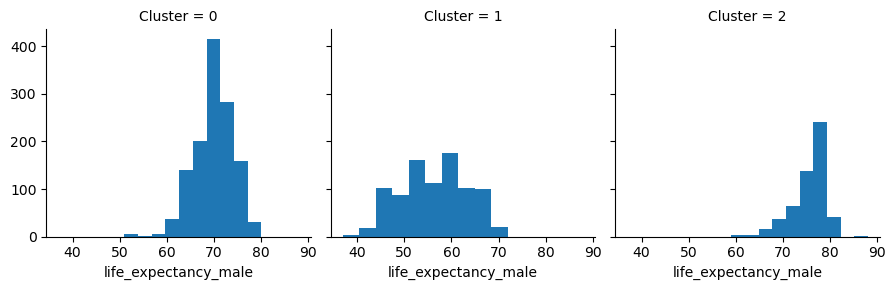

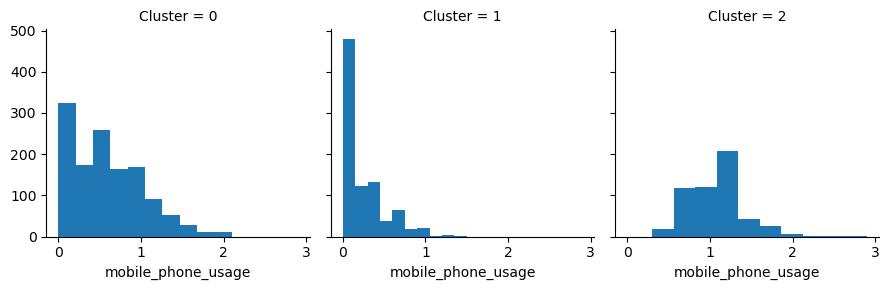

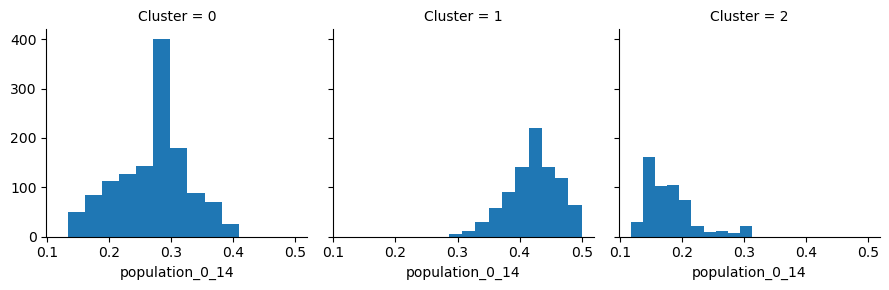

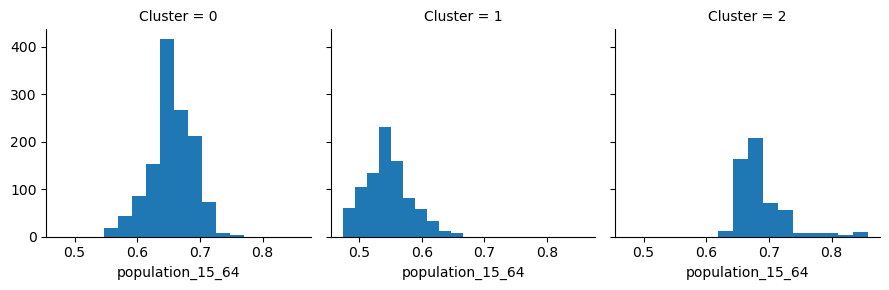

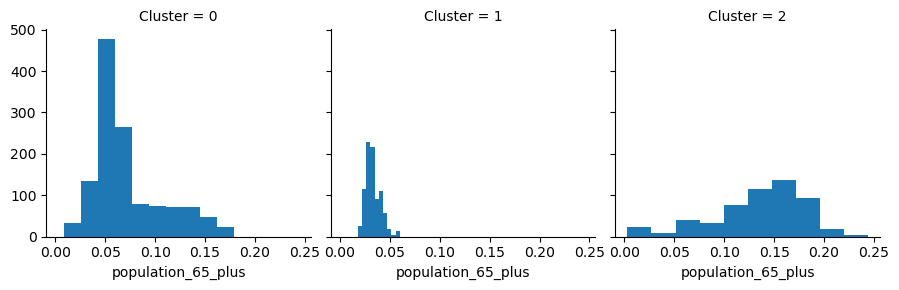

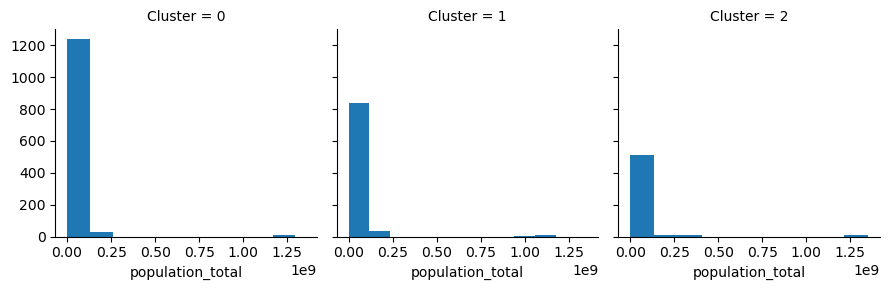

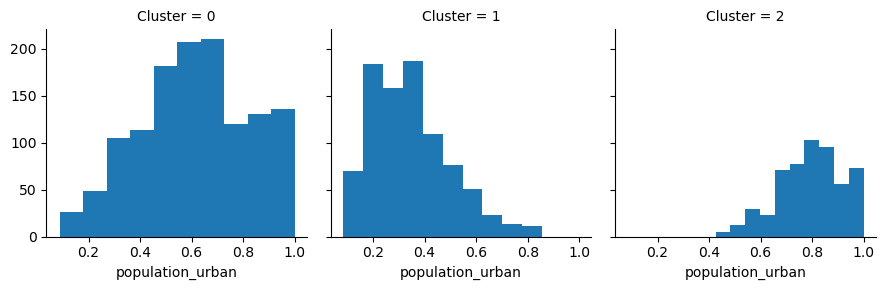

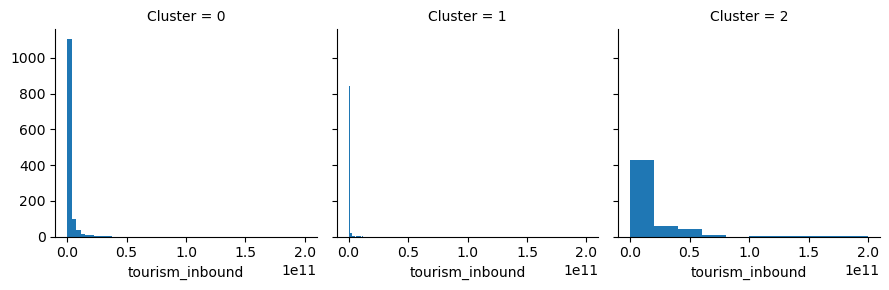

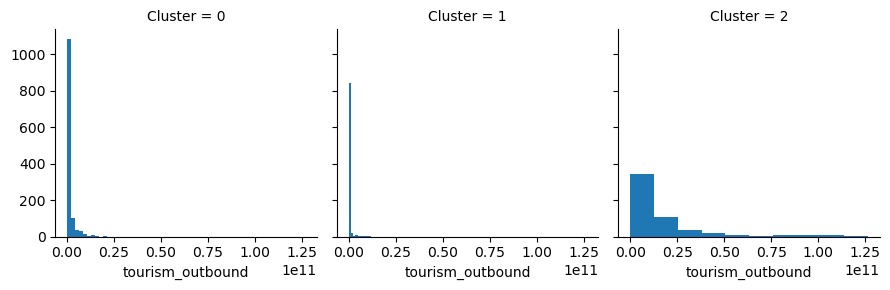

In [99]:
for c in cluster_df.drop(['Cluster'],axis=1):
    grid= sns.FacetGrid(cluster_df, col='Cluster')
    grid= grid.map(plt.hist, c)
plt.show()

# Saving the kmeans clustering model and the data with cluster label

In [122]:
#Saving Scikitlearn models
import joblib
from pickle import load

joblib.dump(kmeans_model, "Model_Kmeans_new")

['Model_Kmeans_new']

In [123]:
cluster_df.to_csv("Clustered_ World_Development_Data.csv")

# Training and testing the model and the data withcluster label

In [102]:
X = cluster_df.drop(['Cluster','country'],axis=1)

y= cluster_df['Cluster']
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=5)

In [103]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [104]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [105]:
clf=SVC()
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 52.83251231527094


array([[341,   0,  29],
       [275,   0,   5],
       [ 74,   0,  88]], dtype=int64)

In [106]:
clf = SVC(kernel= "poly")
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 50.98522167487685


array([[367,   0,   3],
       [280,   0,   0],
       [115,   0,  47]], dtype=int64)

In [107]:
clf = SVC(C= 15, gamma = 50)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 45.566502463054185


array([[370,   0,   0],
       [280,   0,   0],
       [162,   0,   0]], dtype=int64)

In [108]:
#Confusion_Matrix
from sklearn.metrics import classification_report,confusion_matrix
import sklearn.metrics as metrics
print("Confusion Matrix")
print("________")
print(metrics.confusion_matrix(y_test, y_pred))
print("-----------------------------------------------------------------")
print("Classification Report")
print("________")
print(classification_report(y_test, y_pred))

Confusion Matrix
________
[[370   0   0]
 [280   0   0]
 [162   0   0]]
-----------------------------------------------------------------
Classification Report
________
              precision    recall  f1-score   support

           0       0.46      1.00      0.63       370
           1       0.00      0.00      0.00       280
           2       0.00      0.00      0.00       162

    accuracy                           0.46       812
   macro avg       0.15      0.33      0.21       812
weighted avg       0.21      0.46      0.29       812



In [109]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1892, 22)
(1892,)
(812, 22)
(812,)


In [110]:
#Decision_Tree
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(n_estimators=15, max_depth=25, random_state=11)
model3.fit(X_train, y_train)
y_pred = model.fit_predict(X_test)

In [111]:
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as metrics
from sklearn.svm import SVC
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


# Import the classifier of your choice (e.g., Support Vector Machine)

# Assuming you have your training and test data in 'X_train', 'y_train', 'X_test', and 'y_test', respectively

# Create and train your classifier (SVM as an example)
classifier = SVC()  # You can replace 'SVC()' with the classifier of your choice
classifier.fit(X_train, y_train)

# Use the trained classifier to make predictions on the test data
y_pred = classifier.predict(X_test)

# Generate the confusion matrix
print("Confusion Matrix")
print("________")
print(confusion_matrix(y_test, y_pred))
print("-----------------------------------------------------------------")

# Generate the classification report
print("Classification Report")
print("________")
print(classification_report(y_test, y_pred))
print(f"training accuracy : {rf.score(X_train,y_train )}\ntesting accuracy : {rf.score(X_test, y_test)}")

Confusion Matrix
________
[[341   0  29]
 [275   0   5]
 [ 74   0  88]]
-----------------------------------------------------------------
Classification Report
________
              precision    recall  f1-score   support

           0       0.49      0.92      0.64       370
           1       0.00      0.00      0.00       280
           2       0.72      0.54      0.62       162

    accuracy                           0.53       812
   macro avg       0.41      0.49      0.42       812
weighted avg       0.37      0.53      0.42       812

training accuracy : 1.0
testing accuracy : 0.9716748768472906


In [112]:
model.fit(X_train, y_train)

AgglomerativeClustering(linkage='complete', n_clusters=3)

# Model Deployment

In [116]:
import pickle

In [121]:

with open('Model_Kmeans_new', 'wb') as f:
    pickle.dump('Model_Kmeans_new', f)

In [120]:
pickle.dump(model,open('Model_Kmeans_new','wb'))